# Skillbox Platform Course Analytics

<br><br>
**The goal of the analysis:**

The business goal of this project is to prepare an analytics report based on which course creators and editors can update and improve the courses. 

A brief analytical description for each course will be formed first based on the calculated metrics. Then potential course instructor workload will be calculated to evaluate the need to hire more employees. After that, course content quality will be investigated to potentially identify problematic modules that require revision. Finally, presence of seasonal variation will be investigated.

## Codebook

`courses.csv` contains the following columns: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` - course id <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – course title <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – type of the course <br> <br><br>
`students.csv` contains the following columns: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – student id <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – student's city of residence <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – student's birthday <br> <br><br>
`course_contents.csv` contains the following columns: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – course id <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – number of the module within a course <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – module title <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – number of the lesson within a module <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – lesson title <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – internal lesson identification token <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – whether a video is present in the lesson *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – whether the lesson is a homework *(true/false)* <br>
<br><br>
`progresses.csv` contains the following columns: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – progress id <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – student id <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – course id <br> <br><br>
`progress_phases.csv` contains the following columns: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – progress id <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – module number <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – number of the lesson within a module <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – lesson completion status <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – lesson start date <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – lesson finish date <br>
<br><br>

### Creating and combining dataframes

In [2]:
# importing the necessary modules
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


# shaping a pandas dataframe from the data
courses = pd.read_csv("courses.csv")
courses.rename(columns={"id": "course_id", "title": "course_title", "field": "course_field"},
              inplace=True)

course_contents = pd.read_csv("course_contents.csv")

progresses = pd.read_csv("progresses.csv")
progresses.rename(columns={"id": "progress_id"}, inplace=True)

progress_phases = pd.read_csv("progress_phases.csv")

students = pd.read_csv("students.csv")

In [3]:
# checking the relative dataframe size
len(progress_phases) > len(progresses) > len(course_contents) > len(courses)

True

In [4]:
# combining dataframes step-by-step
main = progress_phases.merge(progresses, on="progress_id", how="left")
main = main.merge(course_contents, on=["course_id", "module_number", "lesson_number"], 
                  how="left")
main = main.merge(courses, on="course_id", how="left")

In [5]:
# checking the dataframe size consistency
len(main) == len(progress_phases)

True

In [6]:
main.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,Unnamed: 0,course_title,course_field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,7,Веб-дизайн PRO 2.0,Design
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00,2018-06-20 15:45:07.717209+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False,7,Веб-дизайн PRO 2.0,Design
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00,2018-06-23 08:18:12.784616+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False,7,Веб-дизайн PRO 2.0,Design
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.36178+00,2018-06-21 19:09:30.845034+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False,7,Веб-дизайн PRO 2.0,Design
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True,7,Веб-дизайн PRO 2.0,Design


## 1. Data description

### Data description (part 1)

In [7]:
# total number of courses in the dataset
len(main["course_title"].value_counts())

15

In [151]:
# number of modules within each course
for (course, data) in list(main.groupby("course_title")):
    print("{}: {}".format(course, len(data["module_title"].value_counts())))

Excel Базовый: 9
Java-разработчик: 17
Java-разработчик c нуля: 9
JavaScript с нуля: 18
PHP-разработчик с 0 до PRO. Часть 1: 8
SMM-маркетолог от А до Я: 11
UX-дизайн: 20
Анимация интерфейсов: 21
Веб-вёрстка для начинающих 2.0: 8
Веб-дизайн PRO 2.0: 17
Веб-дизайн Базовый: 17
Веб-дизайн с нуля 2.0: 19
Веб-разработчик: 20
Интернет-маркетолог от Ingate: 18
Руководитель digital-проектов: 17


In [8]:
# number of lessons within each module in each course
for (course, course_data) in list(main.groupby("course_title")):
    print("Курс: {}\n".format(course))
    for (module, module_data) in list(course_data.groupby("module_title")):
        print("\t{}: {}".format(module, len(module_data["lesson_title"].value_counts())))
    print("\n\n")

Курс: Excel Базовый

	 Визуализация данных Excel: 5
	Основной функционал Excel: 11
	Основной функционал Excel (продолжение): 7
	Сводные таблицы Excel: 5
	Формулы и функции Excel. Более сложные формулы: 5
	Формулы и функции Excel. Введение: 3
	Формулы и функции Excel. Продолжаем работать с формулами: 7
	Формулы и функции Excel. Работа с ошибками, проверка данных: 5
	Экзаменационная работа : 1



Курс: Java-разработчик

	Вводный модуль: 8
	Веб-приложения: формы, заголовки и сессии: 6
	Внешний вид GUI и рисование: 7
	Заключительный модуль: 8
	Итоговая тема: 1
	Массивы и коллекции: 7
	Многопоточность: 7
	Наследование и полиморфизм: 6
	Объекты и классы: 9
	Оптимизация кода и приложений: 5
	Основы построения GUI: 7
	Основы построения веб-приложений: 7
	Работа с базами данных: 6
	Работа с файлами и сетью: 8
	Синтаксис языка: 8
	Тестирование и отладка: 5
	Числа, строки и даты: 9



Курс: Java-разработчик c нуля

	Вводный модуль: 7
	Исключения, отладка, тестирование и логгирование: 9
	Массивы и

In [9]:
# median number of lessons within each module in each course
median_list = []
course_list = []
for (course, course_data) in list(main.groupby("course_title")):
    course_list.append(course)
    lesson_counts = []
    for (module, module_data) in list(course_data.groupby("module_title")):
        lesson_counts.append(len(module_data["lesson_title"].value_counts()))
    median_list.append(np.median(lesson_counts))

In [10]:
for i, course in enumerate(course_list):
    print("{}: {}".format(course, median_list[i]))

Excel Базовый: 5.0
Java-разработчик: 7.0
Java-разработчик c нуля: 10.0
JavaScript с нуля: 7.0
PHP-разработчик с 0 до PRO. Часть 1: 4.0
SMM-маркетолог от А до Я: 6.0
UX-дизайн: 3.5
Анимация интерфейсов: 3.0
Веб-вёрстка для начинающих 2.0: 7.0
Веб-дизайн PRO 2.0: 5.0
Веб-дизайн Базовый: 3.0
Веб-дизайн с нуля 2.0: 4.0
Веб-разработчик: 2.0
Интернет-маркетолог от Ingate: 6.5
Руководитель digital-проектов: 5.0


In [11]:
# number of students in each course
for (course, data) in list(main.groupby("course_title")):
    print("{}: {}".format(course, len(data["student_id"].value_counts())))

Excel Базовый: 782
Java-разработчик: 763
Java-разработчик c нуля: 581
JavaScript с нуля: 966
PHP-разработчик с 0 до PRO. Часть 1: 854
SMM-маркетолог от А до Я: 506
UX-дизайн: 1151
Анимация интерфейсов: 598
Веб-вёрстка для начинающих 2.0: 2004
Веб-дизайн PRO 2.0: 1711
Веб-дизайн Базовый: 518
Веб-дизайн с нуля 2.0: 2014
Веб-разработчик: 628
Интернет-маркетолог от Ingate: 2168
Руководитель digital-проектов: 685


In [12]:
# calculating student age statistics

# deleting missing values
students = students.dropna()

# changing the birthday column type to datetime
birthdays = []
for i in students["birthday"]:
    birthdays.append(np.datetime64(i))

In [13]:
students["birthday"] = birthdays
students.head()

,id_,id,city,birthday
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16


In [14]:
# additional column - student age
ages = []
for i in students["birthday"]:
    ages.append(np.datetime64("now") - i)

In [15]:
# changing the units to years and type to float
seconds_per_year = 365 * 24 * 60 * 60
students["age"] = [i.astype("float") / seconds_per_year for i in ages]
students.head()

,id_,id,city,birthday,age
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,41.770406
7,11070,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,29.951228
8,11756,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,33.929310
11,13568,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,33.033419
15,15112,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,30.529310


In [16]:
# Calculating min, max, mean and median age
print("""Min age: {}
Max age: {}
Mean age: {}
Median age: {}""".format(np.min(students["age"]),
                               np.max(students["age"]),
                               np.mean(students["age"]),
                               np.median(students["age"])))

Min age: -7170.506306570269
Max age: 2021.4882139776762
Mean age: 29.968711000578082
Median age: 30.562186580416032


In [17]:
# the min and max values are definitely invalid
# repeat the analysis on a more realistic range - 14 to 90 years old
valid_ages = []
for age in students["age"]:
    if age >= 14 and age <= 90:
        valid_ages.append(age)

In [18]:
# теперь данные больше похожи на правду
print("""Min age: {}
Max age: {}
Mean age: {}
Median age: {}""".format(np.min(valid_ages),
                               np.max(valid_ages),
                               np.mean(valid_ages),
                               np.median(valid_ages)))

Min age: 14.107392059868086
Max age: 86.42794000507357
Mean age: 31.340876167730052
Median age: 30.627940005073565


In [19]:
# stats for student age in each course
students_and_courses = students[["id", "age"]].merge(main[["course_title", "student_id"]], 
                                                     left_on="id", right_on="student_id")

del students_and_courses["id"], students_and_courses["student_id"]
students_and_courses.head()

,age,course_title
0,29.951228,Java-разработчик
1,29.951228,Java-разработчик
2,29.951228,Java-разработчик
3,33.929310,Веб-вёрстка для начинающих 2.0
4,33.929310,Веб-дизайн Базовый


In [20]:
# filter the obtained dataframe (only keep values with age from 14 to 90)
students_and_courses = students_and_courses[(students_and_courses["age"] >= 14) &
                                            (students_and_courses["age"] <= 90)]

In [21]:
# min age for each course
students_and_courses.groupby("course_title").agg(min)

,age
course_title,
Excel Базовый,17.737529
Java-разработчик,16.079995
Java-разработчик c нуля,16.219721
JavaScript с нуля,15.033419
PHP-разработчик с 0 до PRO. Часть 1,15.033419
SMM-маркетолог от А до Я,18.759447
UX-дизайн,16.501913
Анимация интерфейсов,16.501913
Веб-вёрстка для начинающих 2.0,15.033419


In [22]:
# max age for each course
students_and_courses.groupby("course_title").agg(max)

,age
course_title,
Excel Базовый,62.143008
Java-разработчик,65.838899
Java-разработчик c нуля,56.285474
JavaScript с нуля,60.611502
PHP-разработчик с 0 до PRO. Часть 1,76.249858
SMM-маркетолог от А до Я,53.290954
UX-дизайн,86.427940
Анимация интерфейсов,52.532050
Веб-вёрстка для начинающих 2.0,60.611502


In [23]:
# mean age for each course
students_and_courses.groupby("course_title").agg(np.mean)

,age
course_title,
Excel Базовый,34.815150
Java-разработчик,31.353026
Java-разработчик c нуля,31.124112
JavaScript с нуля,29.939547
PHP-разработчик с 0 до PRO. Часть 1,32.537771
SMM-маркетолог от А до Я,30.292495
UX-дизайн,31.964998
Анимация интерфейсов,31.353866
Веб-вёрстка для начинающих 2.0,30.091652


In [24]:
# median age for each course
students_and_courses.groupby("course_title").agg(np.median)

,age
course_title,
Excel Базовый,34.811502
Java-разработчик,30.230680
Java-разработчик c нуля,30.258077
JavaScript с нуля,29.216981
PHP-разработчик с 0 до PRO. Часть 1,31.027940
SMM-маркетолог от А до Я,29.271776
UX-дизайн,31.285474
Анимация интерфейсов,30.666296
Веб-вёрстка для начинающих 2.0,29.058077


### Data Description (part 2)

In [29]:
# forming a sorted dataframe with course types and the number 
# of students in each course
student_count = main.groupby("course_title")["student_id"].agg({"student_id": "count", "student_id": "nunique"})

student_count.index = course_list

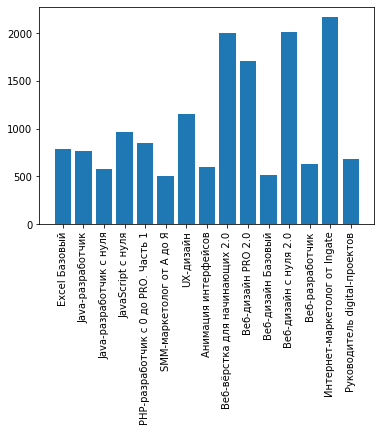

In [170]:
# creating a bar chart
fig, subplot = plt.subplots()
subplot.bar(student_count.index.values, student_count["student_id"].values)

plt.xticks(student_count.index, rotation='vertical')

plt.show()

### Data description (part 3)

In [171]:
# creating a column with course types and sorting
fields = []
for (course, data) in list(main.groupby("course_title")):
    fields.append(list(data["course_field"])[0])

student_count["course_field"] = fields
sc_sorted = student_count.sort_values(by="student_id")

sc_sorted.head()

,student_id,course_field
SMM-маркетолог от А до Я,506,Marketing
Веб-дизайн Базовый,518,Design
Java-разработчик c нуля,581,Development
Анимация интерфейсов,598,Design
Веб-разработчик,628,Development


782.0


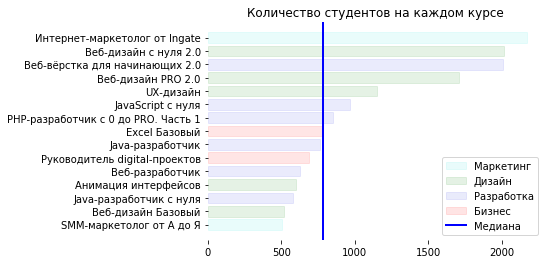

In [172]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# creating a horizontal bar chart
fig, subplot = plt.subplots()
bars = plt.barh(sc_sorted.index.values, sc_sorted["student_id"].values, alpha=0.1)

# changing the color depending on the course type
for i in range(len(course_list)):
    if list(sc_sorted.iterrows())[i][1][1] == "Marketing":
        bars[i].set_color('#2fe5df')
    elif list(sc_sorted.iterrows())[i][1][1] == "Design":
        bars[i].set_color('g')
    elif list(sc_sorted.iterrows())[i][1][1] == "Development":
        bars[i].set_color('#323ee6')
    else:
        bars[i].set_color('r')

# adding the legend
plt.legend(handles=[mpatches.Patch(color='#2fe5df', label="Маркетинг", alpha=0.1),
                    mpatches.Patch(color='g', label="Дизайн", alpha=0.1),
                    mpatches.Patch(color='#323ee6', label="Разработка", alpha=0.1),
                    mpatches.Patch(color='r', label="Бизнес", alpha=0.1),
                    Line2D([0], [0], color='b', lw=2, label='Медиана')])

# setting the title
subplot.set_title("Количество студентов на каждом курсе")

# plotting the median line
median_value = np.median(sc_sorted["student_id"])
plt.axvline(median_value, color='blue', linewidth=2)
print(median_value)

# removing the frame
plt.box(on=None)

plt.show()

### Data description (part 4 - conclusions)

The dataframe contains data on 15 courses of 4 distinct types - marketing, design, development and business. The number of modules in each course varies from 8 to 21 whereas the median number of lessons in each module is in the range from 2 to 10.

The largest number of students is in the “Интернет-маркетолог от Ingate” (Ingate Internet Marketer) course, the lowest - in “SMM-маркетолог от А до Я” (“SMM-Marketer from A to Z”). The median number of students per course is 782. The distribution of intermediate values if fairly uniform, the greatest jump occurs from the 5th to the 4th position when sorting in descending order (from “UX-дизайн”/“UX-design” to “Веб-дизайн PRO 2.0”/“Web-design PRO 2.0” - see the bar chart in part 3.)

The median and mean student age without considering incorrectly inputted values is approximately 29-30 years. The lowest student age is found in “Веб-вёрстка для начинающих 2.0” (“Web development for beginners 2.0”) and "Веб-разработчик" (“Web developer”), the highest - in “UX-дизайн” (“UX-design”). The course with the lowest mean and median student age (about 27 years and 11 months, and 27 years and 2 months respectively) is “Веб-разработчик” (“Web developer), the highest (the median and mean are both about 33 years and 7.5 months) - “Excel Базовый” (“Excel basics”).

## 2. Calculating potential course instructor workload

### Calculating workload (part 1)

In [111]:
main["start_date"] = main["start_date"].astype("datetime64")

In [112]:
tmp = main[["course_title", "student_id", "start_date", "is_homework"]]
tmp = tmp[tmp["is_homework"] == True]

In [113]:
# creating a separate df for each course to cut runtime
courses = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
           "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
           "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
           "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
           "Руководитель digital-проектов"]

In [114]:
def create_df(course):
    return tmp[tmp["course_title"] == course]

In [115]:
df_list = [create_df(courses[i]) for i in range(len(courses))]

In [116]:
for df in df_list:
    df.sort_values(by="start_date", inplace=True)

In [117]:
# extracting month and year from dates
for i, df in enumerate(df_list):
    df["start_date"] = df["start_date"].astype("str")
    df_list[i]["month/year"] = [j[2:4] + "/" + j[5:7] for j in df_list[i]["start_date"]]

df_list[0].head()

,course_title,student_id,start_date,is_homework,month/year
48211,Excel Базовый,c7d9f03162dab0e04e28067dafddb050,2018-02-19 12:32:48.645567,True,18/02
187561,Excel Базовый,0d26ca1f35d89ee06970eadd007c9eab,2018-02-19 12:32:52.450442,True,18/02
187585,Excel Базовый,0d26ca1f35d89ee06970eadd007c9eab,2018-02-19 12:33:00.394486,True,18/02
187602,Excel Базовый,0d26ca1f35d89ee06970eadd007c9eab,2018-02-19 12:33:13.046842,True,18/02
48248,Excel Базовый,c7d9f03162dab0e04e28067dafddb050,2018-02-19 12:33:16.386750,True,18/02


In [118]:
# a function to calculate monthly increase
def extract_data(data):
    df = data.groupby("student_id").agg("first")
    df["student"] = df.index
    df = df.groupby("month/year").agg({"student": "count"})
    return df

In [119]:
# calculating the increase for each dataframe
processed_dfs = [extract_data(df_list[i]) for i, df in enumerate(df_list)]

In [120]:
processed_dfs[0].head()

,student
month/year,
18/02,6
18/03,3
18/05,3
18/06,9
18/07,13


In [121]:
# shaping a df filled with zeros
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
years = ["16", "17", "18", "19"]
combinations = []

for i in years:
    if i == "16":
        for j in months[2:]:
            combinations.append(i + "/" + j)
    elif i == "17" or i == "18":
        for j in months:
            combinations.append(i + "/" + j)
    else:
        for j in months[:7]:
            combinations.append(i + "/" + j)

In [122]:
count_per_month = pd.DataFrame(np.zeros((len(courses), len(combinations))))
count_per_month.columns = [i for i in combinations]
count_per_month.index = courses

In [123]:
count_per_month.head()

,16/03,16/04,16/05,16/06,16/07,16/08,16/09,16/10,16/11,16/12,...,18/10,18/11,18/12,19/01,19/02,19/03,19/04,19/05,19/06,19/07
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
# filling the actual values (leave as 0 for missing dates)
def check_df(df, row, column):
    for i in df.index:
        if i == column:
            count_per_month.loc[row, column] = df["student"][i]

In [125]:
for i, row in enumerate(count_per_month.index):
    for column in count_per_month.columns:
        check_df(processed_dfs[i], row, column)

In [126]:
count_per_month.head()

,16/03,16/04,16/05,16/06,16/07,16/08,16/09,16/10,16/11,16/12,...,18/10,18/11,18/12,19/01,19/02,19/03,19/04,19/05,19/06,19/07
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30.0,33.0,43.0,52.0,46.0,63.0,46.0,45.0,43.0,28.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,32.0,102.0,75.0,50.0,74.0,7.0,4.0,5.0,2.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,109.0,74.0,98.0,63.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,36.0,37.0,57.0,42.0,57.0,49.0,51.0,34.0,21.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,27.0,35.0,35.0,23.0,38.0,32.0,31.0,29.0,15.0


### Calculating workload (part 2)

In [127]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [128]:
# creating a plotting function
def draw_line(data, title):
    # getting the figure ready
    fig, subplot = plt.subplots()
    
    # specifying axis data and plotting
    x_ticks = combinations
    y_ticks = data
    subplot.plot(x_ticks, y_ticks)
    
    # title, axis labels
    subplot.set_title("Ежемесячный прирост студентов курса " + title + " (март 2016 - июль 2019)")
    subplot.set_xlabel("Год/Месяц")
    subplot.set_ylabel("Прирост студентов")
    
    plt.xticks(x_ticks, rotation='vertical', fontsize=7)
    
    plt.show()

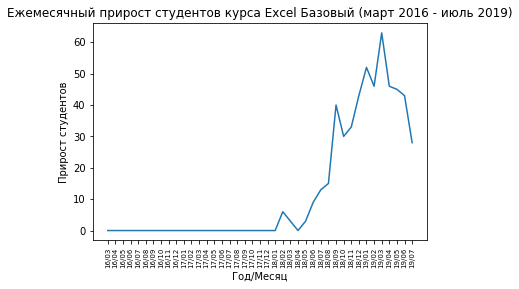

In [129]:
# plotting each of the 15 graphs
draw_line(count_per_month.iloc[0], courses[0])

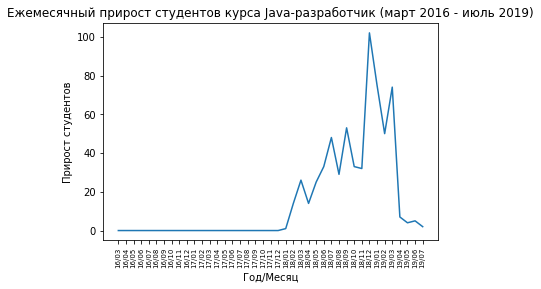

In [130]:
draw_line(count_per_month.iloc[1], courses[1])

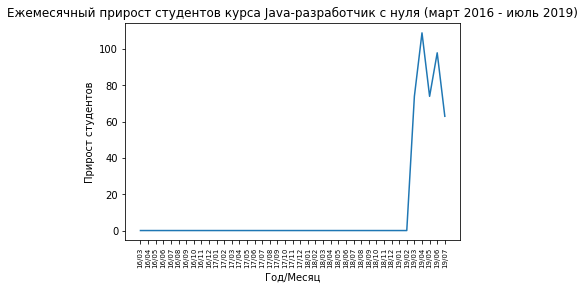

In [131]:
draw_line(count_per_month.iloc[2], courses[2])

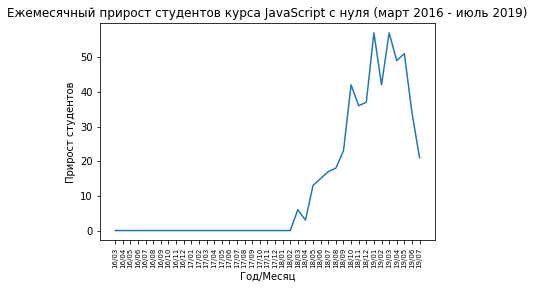

In [132]:
draw_line(count_per_month.iloc[3], courses[3])

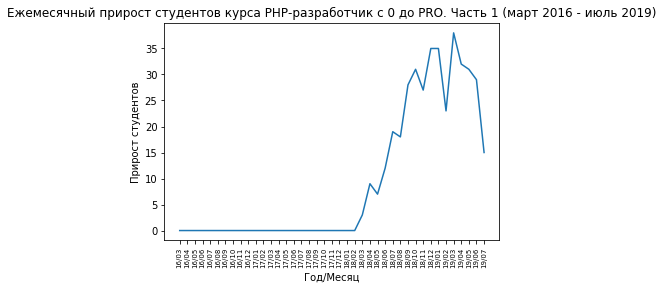

In [133]:
draw_line(count_per_month.iloc[4], courses[4])

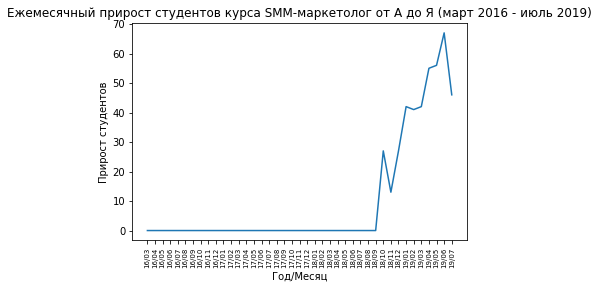

In [134]:
draw_line(count_per_month.iloc[5], courses[5])

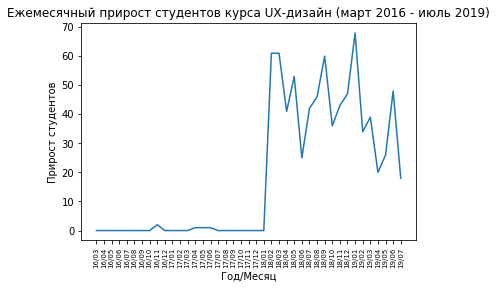

In [135]:
draw_line(count_per_month.iloc[6], courses[6])

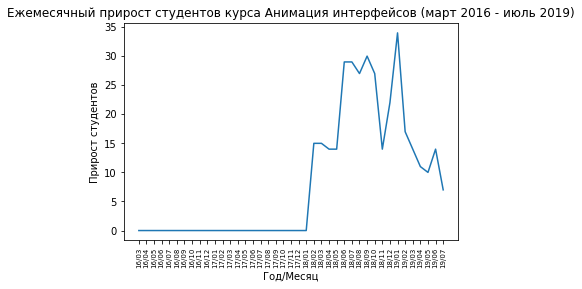

In [136]:
draw_line(count_per_month.iloc[7], courses[7])

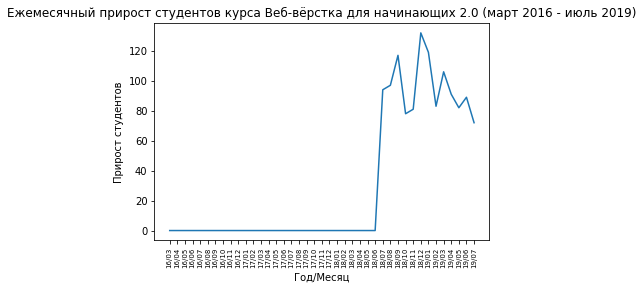

In [137]:
draw_line(count_per_month.iloc[8], courses[8])

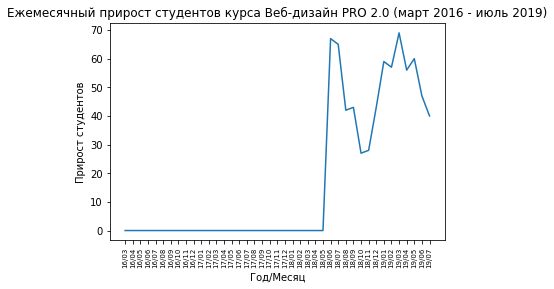

In [138]:
draw_line(count_per_month.iloc[9], courses[9])

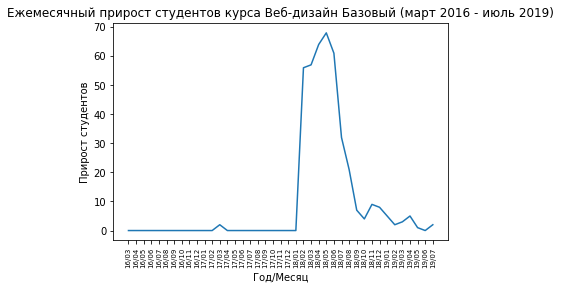

In [139]:
draw_line(count_per_month.iloc[10], courses[10])

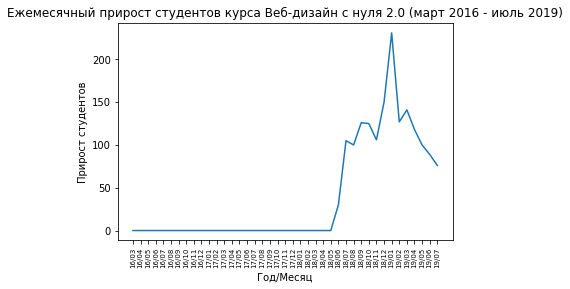

In [140]:
draw_line(count_per_month.iloc[11], courses[11])

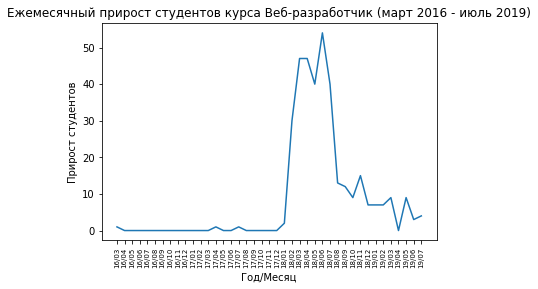

In [141]:
draw_line(count_per_month.iloc[12], courses[12])

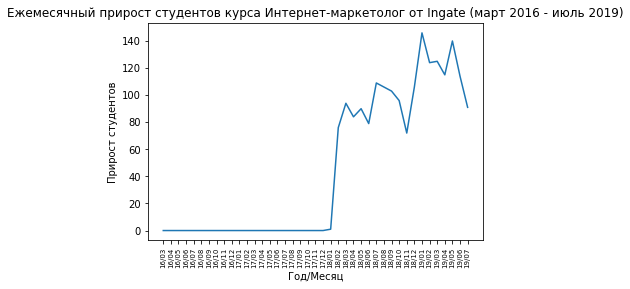

In [142]:
draw_line(count_per_month.iloc[13], courses[13])

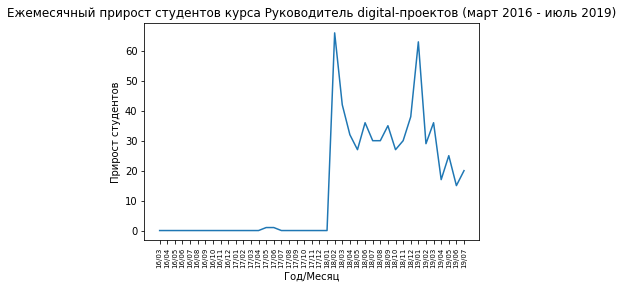

In [143]:
draw_line(count_per_month.iloc[14], courses[14])

### Calculating workload (part 3)

In [144]:
# creating a function to plot 15 graphs in 1 figure
import matplotlib.patches as mpatches

def draw_all():
    # changing the figure size
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    # setting x-ticks
    x_ticks = combinations
    
    # creating a dict to store data for each course
    data_dict = dict()
    for i, row in enumerate(count_per_month.index):
        data_dict["y" + str(i)] = count_per_month.iloc[i]
    
    # creating a list with y-ticks
    for key, value in data_dict.items():
        globals()[key] = value
    y_ticks = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14]
    
    # a list of contrasting colors
    colors = ["#562349", "#f1ebbb", "#45046a", "#b5076b", "#3f3f44",
              "#abf0e9", "#00005c", "#ffd31d", "#dddddd", "r",
              "#1b1b2f", "#ca5116", "#fc7e2f", "#00909e", "000000"]
    
    # creating (data, color) tuples
    pairs = []
    for i in range(len(y_ticks)):
        pairs.append((y_ticks[i], colors[i]))
    
    # plotting the graphs
    for y_data, color in pairs:
        plt.plot(x_ticks, y_data, color=color)
    
    # creating a legend
    patches = [mpatches.Patch(color=colors[i], label=courses[i]) for i in range(len(courses))]
    
    plt.legend(handles=patches, fontsize=10, frameon=False, bbox_to_anchor=(1.0, 1.0))
    
    # titles, axis labels
    plt.title("Ежемесячный прирост студентов на каждом курсе (март 2016 - июль 2019)")
    plt.xlabel("Год/Месяц")
    plt.ylabel("Прирост студентов")
    
    # changing the x-tick orientation
    plt.xticks(x_ticks, rotation='vertical', fontsize=10)
    
    # removing the frame
    plt.box(on=None)
    plt.show()

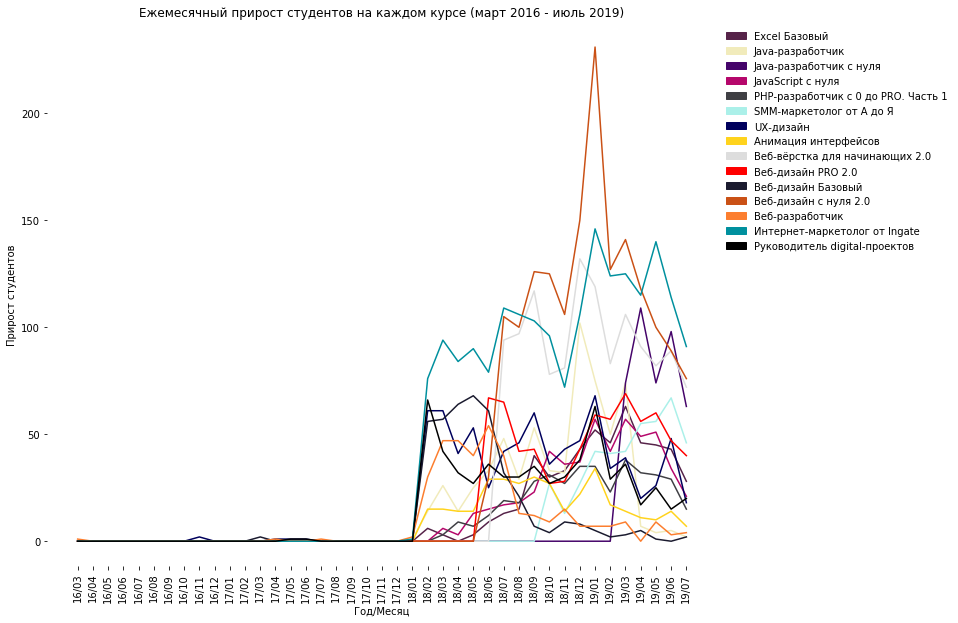

In [145]:
draw_all()

### Calculating workload (part 4)

In [146]:
main["start_date"] = main["start_date"].astype("str")
main["finish_date"] = main["finish_date"].astype("str")

In [147]:
tmp2 = main[["course_title", "module_title", "start_date", "finish_date", "status", "is_homework"]]
tmp2 = tmp2[tmp2["is_homework"] == True]
tmp2.sort_values(by="start_date").head()

,course_title,module_title,start_date,finish_date,status,is_homework
215412,Веб-разработчик,О программе,2016-03-15 17:39:14.000000,2016-03-15 18:30:22+00,done,True
215416,Веб-разработчик,HTML. Общая структура HTML-документа,2016-03-16 16:52:18.000000,2016-03-17 05:42:13+00,done,True
215410,Веб-разработчик,HTML. Формы,2016-03-17 10:10:13.000000,2016-03-18 07:26:45+00,done,True
215414,Веб-разработчик,CSS. Знакомство со стилями,2016-03-18 17:56:32.000000,2016-03-20 16:15:24+00,done,True
215417,Веб-разработчик,Позиционирование при помощи CSS,2016-03-24 05:25:49.000000,2016-03-26 12:07:21+00,done,True


In [148]:
# creating a separate df for each course to cut runtime
courses = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
           "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
           "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
           "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
           "Руководитель digital-проектов"]

In [150]:
def create_df(course):
    return tmp2[tmp2["course_title"] == course]

In [151]:
df_list = [create_df(courses[i]) for i in range(len(courses))]

In [152]:
# creating a list with all month-year combinations
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
years = ["16", "17", "18", "19"]
combinations = []

for i in years:
    if i == "16":
        for j in months[2:]:
            combinations.append(i + "/" + j)
    elif i == "17" or i == "18":
        for j in months:
            combinations.append(i + "/" + j)
    else:
        for j in months[:7]:
            combinations.append(i + "/" + j)

In [153]:
# extracting month and year from homework start and finish dates
for i, df in enumerate(df_list):
    df_list[i]["start"] = [j[2:4] + "/" + j[5:7] for j in df_list[i]["start_date"]]
    df_list[i]["finish"] = [j[2:4] + "/" + j[5:7] for j in df_list[i]["finish_date"]]

df_list[0].head()

,course_title,module_title,start_date,finish_date,status,is_homework,start,finish
428,Excel Базовый,Основной функционал Excel,2018-12-10 16:15:15.891656,2018-12-12 10:17:59.8285+00,done,True,18/12,18/12
435,Excel Базовый,Экзаменационная работа,2019-01-23 20:00:33.760907,nan,start,True,19/01,n/
442,Excel Базовый,Визуализация данных Excel,2019-01-19 06:17:52.525892,2019-01-26 09:57:27.308118+00,done,True,19/01,19/01
445,Excel Базовый,Сводные таблицы Excel,2019-01-21 16:32:24.256451,2019-01-26 09:56:31.61019+00,done,True,19/01,19/01
448,Excel Базовый,Формулы и функции Excel. Более сложные формулы,2019-01-08 14:22:11.289178,2019-01-11 12:02:15.758572+00,done,True,19/01,19/01


In [154]:
# creating a dict with progress for each course in each month
hw_data = dict()
for course in courses:
    hw_data[course] = dict()
    for combination in combinations:
        hw_data[course][combination] = 0

In [155]:
# filling the dict with start dates
for course_num, df in enumerate(df_list):
    for i, value in enumerate(df.index):
        hw_data[courses[course_num]][df.iloc[i, 6]] += 1

In [156]:
hw_data

{'Excel Базовый': {'16/03': 0,
  '16/04': 0,
  '16/05': 0,
  '16/06': 0,
  '16/07': 0,
  '16/08': 0,
  '16/09': 0,
  '16/10': 0,
  '16/11': 0,
  '16/12': 0,
  '17/01': 0,
  '17/02': 0,
  '17/03': 0,
  '17/04': 0,
  '17/05': 0,
  '17/06': 0,
  '17/07': 0,
  '17/08': 0,
  '17/09': 0,
  '17/10': 0,
  '17/11': 0,
  '17/12': 0,
  '18/01': 0,
  '18/02': 37,
  '18/03': 6,
  '18/04': 12,
  '18/05': 16,
  '18/06': 32,
  '18/07': 69,
  '18/08': 82,
  '18/09': 163,
  '18/10': 216,
  '18/11': 204,
  '18/12': 190,
  '19/01': 290,
  '19/02': 290,
  '19/03': 308,
  '19/04': 277,
  '19/05': 280,
  '19/06': 251,
  '19/07': 164},
 'Java-разработчик': {'16/03': 0,
  '16/04': 0,
  '16/05': 0,
  '16/06': 0,
  '16/07': 0,
  '16/08': 0,
  '16/09': 0,
  '16/10': 0,
  '16/11': 0,
  '16/12': 0,
  '17/01': 0,
  '17/02': 0,
  '17/03': 0,
  '17/04': 0,
  '17/05': 0,
  '17/06': 0,
  '17/07': 0,
  '17/08': 0,
  '17/09': 0,
  '17/10': 0,
  '17/11': 0,
  '17/12': 0,
  '18/01': 1,
  '18/02': 28,
  '18/03': 94,
  '18/04

In [158]:
# completing the dict with data with different start and end dates
# creating a function to work with such data
def finalize_hw(df_list, target_dict=hw_data):
    for i, df in enumerate(df_list):
        for j, value in enumerate(df.index):
            if df.iloc[j, 6] != df.iloc[j, 7]:
                start = combinations.index(df.iloc[j, 6])
                if df.iloc[j, 7] != "n/":
                    end = combinations.index(df.iloc[j, 7])
                else:
                    continue
                for combination in combinations[start + 1:end + 1]:
                    target_dict[courses[i]][combination] += 1

In [159]:
finalize_hw(df_list)

In [160]:
hw_data

{'Excel Базовый': {'16/03': 0,
  '16/04': 0,
  '16/05': 0,
  '16/06': 0,
  '16/07': 0,
  '16/08': 0,
  '16/09': 0,
  '16/10': 0,
  '16/11': 0,
  '16/12': 0,
  '17/01': 0,
  '17/02': 0,
  '17/03': 0,
  '17/04': 0,
  '17/05': 0,
  '17/06': 0,
  '17/07': 0,
  '17/08': 0,
  '17/09': 0,
  '17/10': 0,
  '17/11': 0,
  '17/12': 0,
  '18/01': 0,
  '18/02': 37,
  '18/03': 7,
  '18/04': 13,
  '18/05': 17,
  '18/06': 37,
  '18/07': 78,
  '18/08': 92,
  '18/09': 188,
  '18/10': 244,
  '18/11': 243,
  '18/12': 246,
  '19/01': 333,
  '19/02': 351,
  '19/03': 376,
  '19/04': 337,
  '19/05': 345,
  '19/06': 299,
  '19/07': 211},
 'Java-разработчик': {'16/03': 0,
  '16/04': 0,
  '16/05': 0,
  '16/06': 0,
  '16/07': 0,
  '16/08': 0,
  '16/09': 0,
  '16/10': 0,
  '16/11': 0,
  '16/12': 0,
  '17/01': 0,
  '17/02': 0,
  '17/03': 0,
  '17/04': 0,
  '17/05': 0,
  '17/06': 0,
  '17/07': 0,
  '17/08': 0,
  '17/09': 0,
  '17/10': 0,
  '17/11': 0,
  '17/12': 0,
  '18/01': 1,
  '18/02': 29,
  '18/03': 110,
  '18/0

In [161]:
# combining into one df
hw_per_month = pd.DataFrame(np.zeros((len(courses), len(combinations))))
hw_per_month.columns = [i for i in combinations]
hw_per_month.index = courses

In [162]:
for course in hw_per_month.index:
    for combination in hw_per_month.columns:
        hw_per_month.loc[course, combination] = hw_data[course][combination]

In [163]:
hw_per_month.head()

,16/03,16/04,16/05,16/06,16/07,16/08,16/09,16/10,16/11,16/12,...,18/10,18/11,18/12,19/01,19/02,19/03,19/04,19/05,19/06,19/07
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244.0,243.0,246.0,333.0,351.0,376.0,337.0,345.0,299.0,211.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,258.0,243.0,405.0,489.0,473.0,519.0,317.0,224.0,141.0,64.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,120.0,531.0,677.0,999.0,842.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,183.0,202.0,224.0,355.0,360.0,381.0,351.0,368.0,359.0,183.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,146.0,129.0,162.0,186.0,125.0,161.0,172.0,172.0,126.0,66.0


### Calculating workload (part 5)

In [164]:
# creating a plotting function
def draw_line(data, title):
    # getting the figure ready
    fig, subplot = plt.subplots()
    
    # specifying axis data and plotting
    x_ticks = combinations
    y_ticks = data
    subplot.plot(x_ticks, y_ticks)
    
    # title, axis labels
    subplot.set_title("Выполненные задания по курсу " + title + " (март 2016 - июль 2019)")
    subplot.set_xlabel("Год/Месяц")
    subplot.set_ylabel("Количество заданий")
    
    plt.xticks(x_ticks, rotation='vertical', fontsize=7)
    
    plt.show()

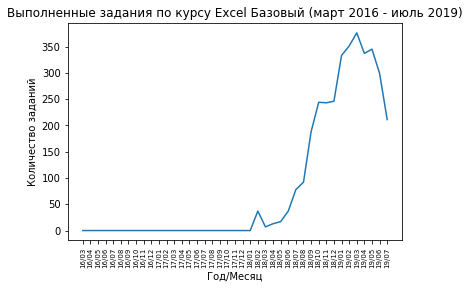

In [165]:
draw_line(hw_per_month.iloc[0], courses[0])

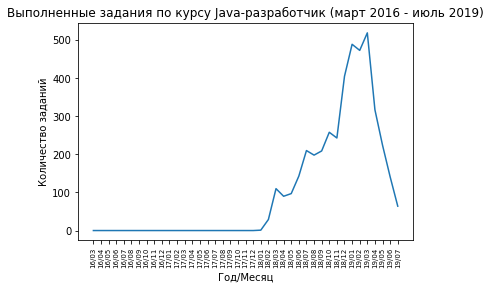

In [166]:
draw_line(hw_per_month.iloc[1], courses[1])

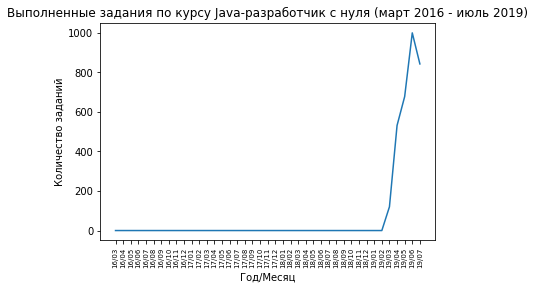

In [167]:
draw_line(hw_per_month.iloc[2], courses[2])

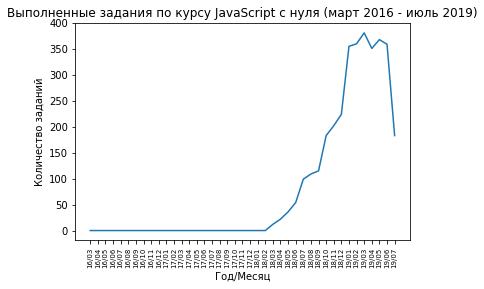

In [168]:
draw_line(hw_per_month.iloc[3], courses[3])

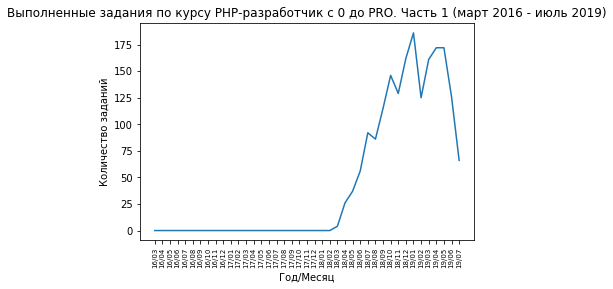

In [169]:
draw_line(hw_per_month.iloc[4], courses[4])

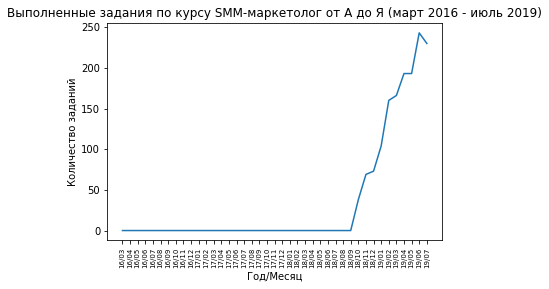

In [170]:
draw_line(hw_per_month.iloc[5], courses[5])

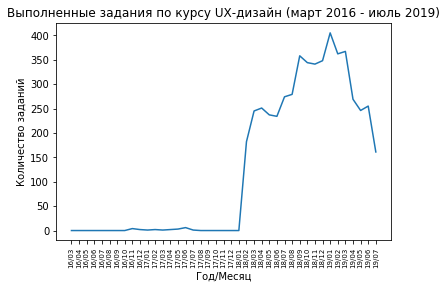

In [171]:
draw_line(hw_per_month.iloc[6], courses[6])

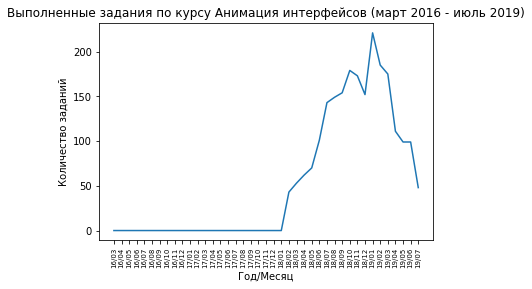

In [172]:
draw_line(hw_per_month.iloc[7], courses[7])

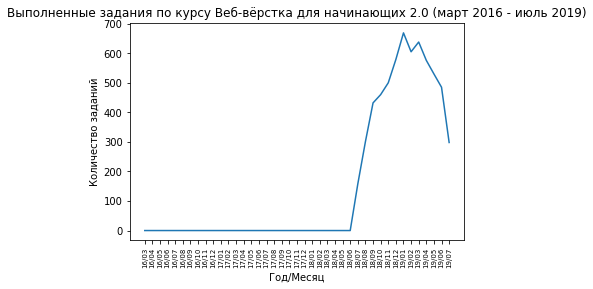

In [173]:
draw_line(hw_per_month.iloc[8], courses[8])

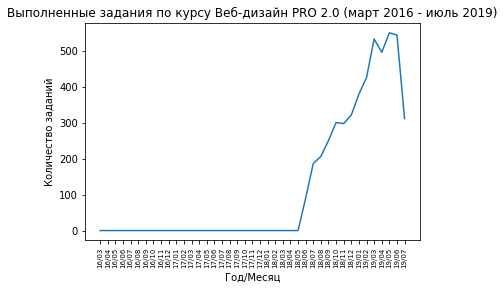

In [174]:
draw_line(hw_per_month.iloc[9], courses[9])

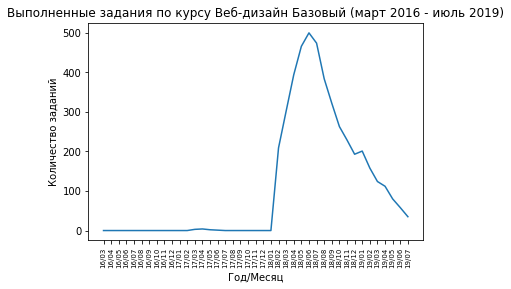

In [175]:
draw_line(hw_per_month.iloc[10], courses[10])

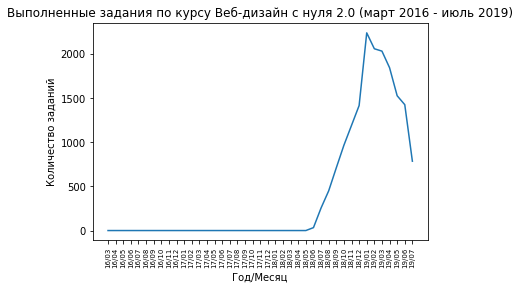

In [176]:
draw_line(hw_per_month.iloc[11], courses[11])

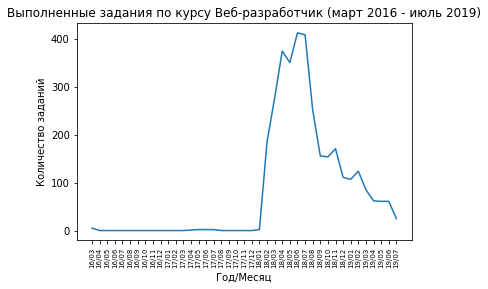

In [177]:
draw_line(hw_per_month.iloc[12], courses[12])

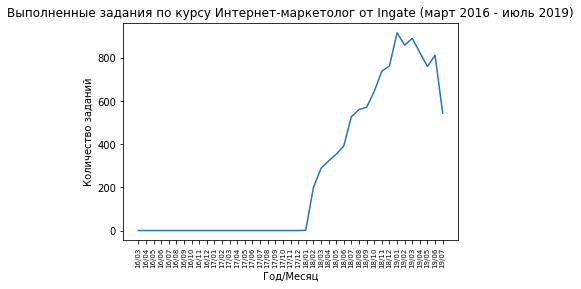

In [178]:
draw_line(hw_per_month.iloc[13], courses[13])

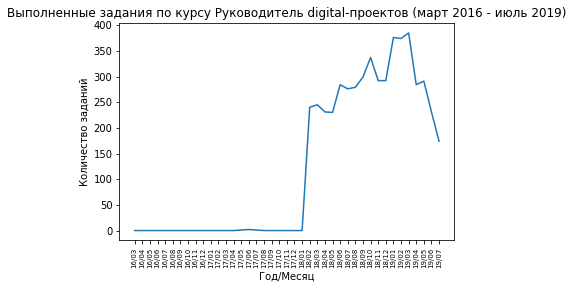

In [179]:
draw_line(hw_per_month.iloc[14], courses[14])

### Calculating workload (part 6)

In [180]:
# creating a function to plot 15 graphs in 1 figure
import matplotlib.patches as mpatches

def draw_all():
    # changing the figure size
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    # setting x-ticks
    x_ticks = combinations
    
    # creating a dict to store data for each course
    data_dict = dict()
    for i, row in enumerate(hw_per_month.index):
        data_dict["y" + str(i)] = hw_per_month.iloc[i]
    
    # creating a list of y-tick variables
    for key, value in data_dict.items():
        globals()[key] = value
    y_ticks = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14]
    
    # a list of contrasting colors
    colors = ["#562349", "#f1ebbb", "#45046a", "#b5076b", "#3f3f44",
              "#abf0e9", "#00005c", "#ffd31d", "#dddddd", "r",
              "#1b1b2f", "#ca5116", "#fc7e2f", "#00909e", "000000"]
    
    # creating (data, color) tuples
    pairs = []
    for i in range(len(y_ticks)):
        pairs.append((y_ticks[i], colors[i]))
    
    # plotting the graphs
    for y_data, color in pairs:
        plt.plot(x_ticks, y_data, color=color)
    
    # creating a legend
    patches = [mpatches.Patch(color=colors[i], label=courses[i]) for i in range(len(courses))]
    
    plt.legend(handles=patches, fontsize=10, frameon=False, bbox_to_anchor=(1.0, 1.0))
    
    # title, axis labels
    plt.title("Выполненные задания на каждом курсе (март 2016 - июль 2019)")
    plt.xlabel("Год/Месяц")
    plt.ylabel("Количество заданий")
    
    # changing the x-ticks orientation
    plt.xticks(x_ticks, rotation='vertical', fontsize=10)
    
    # removing the frame
    plt.box(on=None)
    plt.show()

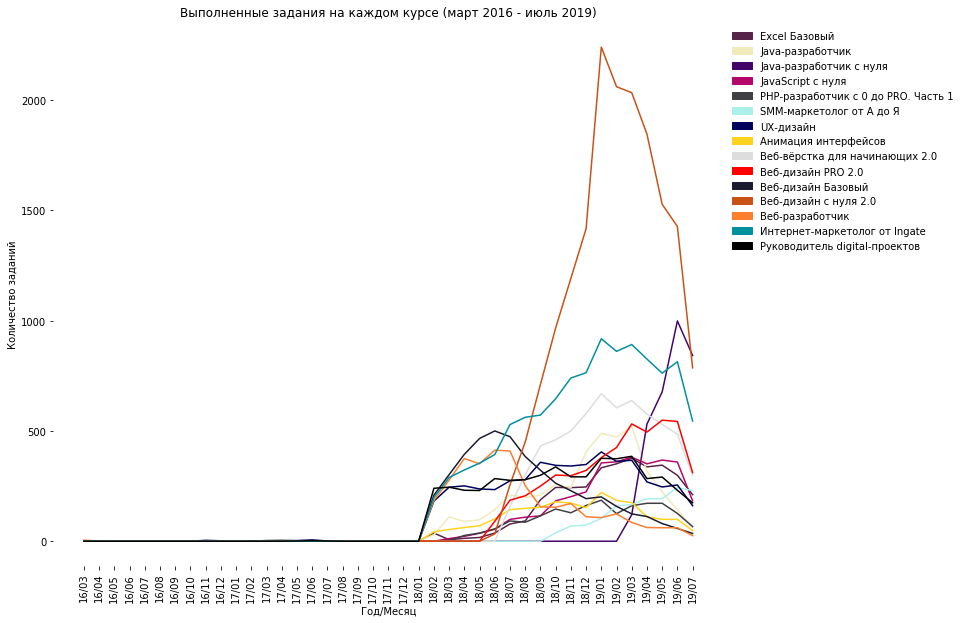

In [181]:
draw_all()

### Calculating workload (part 7 - conclusions)

For a large number of courses the number of students rapidly increased at early stages. It is likely that these peaks correspond to the launch dates of new courses or the admission of new student classes. The increase, however, is slowed down closer to the end of the considered cycle (July 2019) for 12 out of 15 courses. For most courses the behavior is fluctuating - the number of newly admitted students decreases quite rapidly after reaching the peak. Apart from that, for many courses a significant increase happens at the beginning of the calendar year (2018 and 2019). Course activity before the start of 2018 is minimal. Maximum increase is observed for the “Веб-дизайн с нуля 2.0” (“Web development from scratch 2.0”) course in January-February 2019 - the number of newly admitted students is well over 200 whereas for other courses it does not exceed 150 over the entire interval.

Regarding the homework progress in each course, all disciplines share a common trend - gradual increase in the number of completed homework and reaching a sharp peak followed by a decrease closer to the end of the considered period (July 2019). For courses like “PHP-разработчик с 0 до PRO” (“PHP developer from 0 to PRO”) and “Руководитель digital-проектов” (“Digital project manager”) there are several peaks, but otherwise the behavior is similar to that of other courses. More than half of the courses see the peak of the number of completed assignments (and thus the course instructor workload) approximately in February 2019. In general, despite the differences in the absolute number of completed homework assignments and different positioning of the peaks, all plots demonstrate a cyclic increase and decrease of instructor workload. Supporting the data on the increase of admitted students, the greatest number of completed assignments is observed for the “Веб-дизайн с нуля 2.0” (“Web-design from scratch 2.0”) course at the end of 2018/start of 2019.

## 3. Identifying problematic modules

### Identifying problematic modules (part 1)

In [11]:
tmp3 = main[["module_title", "start_date", "finish_date", 
             "status", "is_homework", "course_title"]]
tmp3 = tmp3[(tmp3["is_homework"] == True) &  (tmp3["status"] == "done")]
tmp3.head()

,module_title,start_date,finish_date,status,is_homework,course_title
4,Специализация и личное позиционирование,2018-06-21 19:10:36.957891+00,2018-06-28 15:59:25.320418+00,done,True,Веб-дизайн PRO 2.0
17,"Введение в интернет-маркетинг: цели, инструмен...",2018-02-19 12:30:34.638431+00,2018-02-20 09:16:50.297369+00,done,True,Интернет-маркетолог от Ingate
29,Основы работы с графикой,2018-10-02 19:41:04.983571+00,2018-10-05 17:02:51.913911+00,done,True,Веб-дизайн с нуля 2.0
37,Адаптивность и мобильная версия,2019-01-14 15:59:10.737967+00,2019-01-23 06:22:01.837609+00,done,True,Веб-дизайн с нуля 2.0
38,Формы и кнопки,2018-10-09 20:23:30.413974+00,2019-01-17 08:27:10.791105+00,done,True,Веб-дизайн с нуля 2.0


In [12]:
courses = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
           "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
           "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
           "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
           "Руководитель digital-проектов"]

In [13]:
# changing the date format to datetime64 and calculating the differences
tmp3["start_date"] = tmp3["start_date"].astype("datetime64")
tmp3["finish_date"] = tmp3["finish_date"].astype("datetime64")
tmp3["time"] = tmp3["finish_date"] - tmp3["start_date"]

In [14]:
# changing the time column units to hours
tmp3["time"] = tmp3["time"] / np.timedelta64(1, 'h')

In [15]:
# creating a separate df for each course to cut the runtime
def create_df(course):
    return tmp3[tmp3["course_title"] == course]

In [16]:
df_list = [create_df(courses[i]) for i in range(len(courses))]

In [49]:
def calc_stats(data):
    for func in ["min", "max", "mean", "median"]:
        if func == "median":
            median = data.groupby("module_title").agg({"time": "median"})
        print(func)
        print(data.groupby("module_title").agg({"time": func}), end="\n\n")
    return median

In [50]:
# grouping and calculating metrics for each course,
# saving the dataframes with medians
excel = calc_stats(df_list[0])

min
                                                            time
module_title                                                    
 Визуализация данных Excel                         -1.072222e-07
Основной функционал Excel                          -7.638889e-08
Основной функционал Excel (продолжение)            -8.138889e-08
Сводные таблицы Excel                              -1.141667e-07
Формулы и функции Excel. Более сложные формулы     -8.805556e-08
Формулы и функции Excel. Введение                  -6.527778e-08
Формулы и функции Excel. Продолжаем работать с ... -7.000000e-08
Формулы и функции Excel. Работа с ошибками, про... -1.250000e-07
Экзаменационная работа                              1.644478e+01

max
                                                           time
module_title                                                   
 Визуализация данных Excel                          4196.147725
Основной функционал Excel                           4409.964513
Основной функционал 

In [51]:
java_dev = calc_stats(df_list[1])

min
                                                   time
module_title                                           
Вводный модуль                            -1.272222e-07
Веб-приложения: формы, заголовки и сессии -8.388889e-08
Внешний вид GUI и рисование               -7.916667e-08
Итоговая тема                              1.200483e-03
Массивы и коллекции                       -8.361111e-08
Многопоточность                           -1.119444e-07
Наследование и полиморфизм                -8.444444e-08
Объекты и классы                          -1.058333e-07
Оптимизация кода и приложений             -8.333333e-08
Основы построения GUI                     -8.333333e-08
Основы построения веб-приложений          -1.152778e-07
Работа с базами данных                    -8.722222e-08
Работа с файлами и сетью                  -8.222222e-08
Синтаксис языка                           -6.422222e-07
Тестирование и отладка                    -9.000000e-08
Числа, строки и даты                      -1

In [52]:
java_dev_0 = calc_stats(df_list[2])

min
                                                       time
module_title                                               
Вводный модуль                                     0.292954
Исключения, отладка, тестирование и логгирование  13.655695
Массивы и коллекции                                0.018333
Наследование и полиморфизм                         0.126750
Объекты и классы                                   0.014244
Особенности ООП в Java                            10.350038
Работа с файлами и сетью                          10.238936
Синтаксис языка                                    0.049403
Числа, строки и даты                               0.009325

max
                                                         time
module_title                                                 
Вводный модуль                                    2560.906299
Исключения, отладка, тестирование и логгирование   830.121180
Массивы и коллекции                               1108.706281
Наследование и полимо

In [53]:
js_0 = calc_stats(df_list[3])

min
                                                   time
module_title                                           
JavaScript в браузере; DOM                -7.416667e-08
React                                     -7.138889e-08
Redux                                     -8.027778e-08
Web API                                   -6.888889e-08
jQuery                                    -6.638889e-08
Замыкания                                 -6.500000e-08
Знакомство с языком                       -1.108333e-07
Клиент и сервер                           -8.194444e-08
Массивы и объекты                         -7.611111e-08
Объектно-ориентированное программирование -6.611111e-08
Объекты и конструкторы                    -6.583333e-08
Основы                                    -7.500000e-08
Разное                                    -1.091667e-07
Сборка проектов                           -7.833333e-08
Современный JavaScript; ES 2015           -7.055556e-08
Функции                                   -6

In [54]:
php_0 = calc_stats(df_list[4])

min
                                                            time
module_title                                                    
Cookie/Session                                     -6.388889e-08
База данных MySQL                                   1.132773e+02
Введение в программирование                        -1.336111e-07
Курсовая работа                                     6.066517e+02
Пользовательские функции                           -7.472222e-08
Протокол HTTP/HTTPS                                 3.192277e+00
Структура управления данными. Базовые концепции... -1.041667e-07
Файлы и каталоги                                   -7.111111e-08

max
                                                           time
module_title                                                   
Cookie/Session                                      4491.568846
База данных MySQL                                   3427.686101
Введение в программирование                         6834.941867
Курсовая работа      

In [55]:
smm_a = calc_stats(df_list[5])

min
                                                         time
module_title                                                 
Дизайн для не дизайнеров                         2.469807e+01
Как писать хорошие тексты                        3.161685e+01
Коммьюнити-менеджмент                           -7.166667e-08
Постановка задачи и анализ                      -6.722222e-08
Продвижение в VK, FB, MyTarget                  -8.611111e-08
Разработка креативных решений                   -7.305556e-08
Разработка стратегии продвижения в Social Media -1.008333e-07

max
                                                        time
module_title                                                
Дизайн для не дизайнеров                          718.115526
Как писать хорошие тексты                         493.542538
Коммьюнити-менеджмент                            1493.915645
Постановка задачи и анализ                       5035.074771
Продвижение в VK, FB, MyTarget                   3824.763082
Разраб

In [56]:
ux = calc_stats(df_list[6])

min
                                                            time
module_title                                                    
Concept design: творчество в дизайне               -8.916667e-08
Data driven design: теория и практика              -1.011111e-07
Service design: теория и практика                  -7.972222e-08
UX-проектирование. Исследование интерфейсов        -7.000000e-08
UX-проектирование. Паттерны и психология пользо... -6.944444e-08
Visual design теория и практика                    -1.030556e-07
Основные этапы проекта                             -8.000000e-08
Профессия дизайнера в эпоху цифровых перемен       -7.166667e-08
Специализация и карьера                            -8.222222e-08
Техника успешной презентации                       -7.777778e-08
Экзаменационная тема                                1.741538e-02

max
                                                           time
module_title                                                   
Concept design: тв

In [57]:
anim = calc_stats(df_list[7])

min
                                                            time
module_title                                                    
12 принципов анимации от Walt Disney Studio         7.011111e-07
After Effects                                       6.980556e-07
Material Design                                     6.425000e-07
Motion design в интерфейсах                         4.922222e-07
Principle (обновлён 06.06.19)                       7.116667e-07
Webflow — инструмент прототипирования веб-интер...  7.602778e-07
Анимация концепции для презентации клиенту          6.741667e-07
Анимация статичной концепции                        9.947222e-07
Введение в Motion Design. Тренды, разновидности...  9.111111e-07
Видеобаннеры. Тренд, который заслуживает внимания   6.350000e-07
Дипломная работа                                    1.674070e+02
Иконки — погружение в мир микроанимации             1.162500e-06
Прелоадеры                                          8.675000e-07
Чистая магия — cоздан

In [58]:
web1 = calc_stats(df_list[8])

min
                                          time
module_title                                  
Advanced CSS                     -8.250000e-08
HTML                             -9.166667e-08
Адаптивность и кроссбраузерность -1.013889e-07
Вводный модуль                   -9.777778e-08
Инструменты верстальщика          4.452874e+01
Основы CSS                       -6.555556e-08
Основы JavaScript                -1.111111e-07
Оформление                       -1.347222e-07

max
                                         time
module_title                                 
Advanced CSS                      5083.080529
HTML                              6230.890819
Адаптивность и кроссбраузерность  6908.163278
Вводный модуль                    7492.097145
Инструменты верстальщика          5191.694319
Основы CSS                        6952.547782
Основы JavaScript                 6938.793883
Оформление                        5660.706469

mean
                                        time
module_tit

In [59]:
web2 = calc_stats(df_list[9])

min
                                                 time
module_title                                         
 Введение в UX                          -8.055556e-08
Adobe XD                                 7.141881e+00
Cinema 4D + Blender                      1.058526e+01
Readymag                                -1.169444e-07
Иконки                                  -9.861111e-08
Кейс на 1000 лайков                      1.659503e+01
Концептуальный дизайн                   -9.277778e-08
Копирайтинг                             -8.611111e-08
План развития дизайнера на 3 года        3.684681e+00
Портреты пользователей и CJM            -6.916667e-08
Продвинутая презентация                 -8.555556e-08
Специализация и личное позиционирование -8.444444e-08
Типографика PRO                         -6.833333e-08

max
                                                time
module_title                                        
 Введение в UX                           5335.784922
Adobe XD              

In [60]:
web3 = calc_stats(df_list[10])

min
                                                           time
module_title                                                   
Базовые знания о типографике. Практика Photoshop  -1.105556e-07
Графика для сайтов                                -1.488889e-07
Дипломная работа                                   2.361334e+02
Интерактивные элементы                            -1.177778e-07
Интерактивные элементы. Практика Photoshop        -1.422222e-07
Инфографика. Практика Photoshop                   -1.394444e-07
Инфографика: как сделать сайты интересными        -1.305556e-07
Основы работы с графикой. Практика Photoshop      -9.472222e-08
Универсальные элементы сайтов. Практика Photoshop -1.261111e-07
Формы и кнопки. Практика Photoshop                -1.511111e-07
Формы и кнопки: интерактивные элементы            -1.236111e-07
Цвет, атмосфера, тексты и здравый смысл           -1.283333e-07

max
                                                           time
module_title                   

In [61]:
web4 = calc_stats(df_list[11])

min
                                                        time
module_title                                                
 Адаптивность и мобильная версия                8.773578e-01
3D-элементы в Photoshop                         1.755137e-01
Введение и первый результат                    -1.288889e-07
Главная страница, первые шаги                  -7.722222e-08
Декомпозиция                                   -1.225000e-07
Декомпозиция промо-страницы                     5.171508e+00
Интересная подача информации                   -7.611111e-08
Навигация и структура                          -9.277778e-08
Основы работы с графикой                       -6.805556e-08
Первый кейс на Behance                          3.195588e+00
Передача проекта в верстку                      1.191345e+00
Презентация для клиента                         1.601382e+00
Работа со стилями. Создание GUI                -8.750000e-08
Тренды, подготовка, мудборды                   -6.555556e-08
Формы и кнопки      

In [62]:
web5 = calc_stats(df_list[12])

min
                                                        time
module_title                                                
CSS. Знакомство со стилями                     -8.166667e-08
HTML. Общая структура HTML-документа           -1.147222e-07
HTML. Формы                                    -8.416667e-08
Javascript – события часть 1                   -1.333333e-07
Javascript – события часть 2                   -1.177778e-07
Javascript – события. Модель обработки событий -1.297222e-07
PHP. Взаимодействие  с браузером               -1.105556e-07
PHP. Генерация, работа  с изображениями        -9.944444e-08
PHP. Место в структуре сайта                   -7.166667e-08
PHP. Пользовательские функции                  -1.036111e-07
PHP. Работа с файловой системой                -7.861111e-08
SQL БД. Концепция, назначение                  -9.333333e-08
Знакомство с JavaScript                        -9.777778e-08
О программе                                    -1.561111e-07
Позиционирование при

In [63]:
int_mark = calc_stats(df_list[13])

min
                                                            time
module_title                                                    
Email-маркетинг                                    -1.263889e-07
SEO: больше, чем поисковая выдача (обновление о... -1.333333e-07
SMM (обновление от 15 февраля 2019 г)              -1.419444e-07
Введение в интернет-маркетинг: цели, инструмент... -1.216667e-07
Веб-аналитика: максимум информации об эффективн... -1.055556e-07
Исследование целевой аудитории: портретирование... -1.077778e-07
Контекстная реклама в Yandex Direct и Google Ad... -1.263889e-07
Контент-маркетинг: стратегия коммуникации, кана... -1.591667e-07
Маркетплейсы                                       -1.722222e-07
Медиапланирование: разработка комплексной страт... -1.477778e-07
Медийная реклама и RTB: охват или целевые польз... -1.386111e-07
Партнерский CPA-маркетинг                          -1.313889e-07
Построение маркетинговой структуры и работа с к... -1.272222e-07
Таргетированная рекла

In [64]:
dig_man = calc_stats(df_list[14])

min
                                                            time
module_title                                                    
Scrum. Передовая методология управления digital... -8.527778e-08
Scrum: передовая методология управления совреме... -1.022222e-07
Аналитика. Базовые навыки                          -7.555556e-08
Интеграционные проекты.                            -8.055556e-08
Как пасти котов: правильное делегирование в IT     -1.041667e-07
Контроль. Риски. Поощрения. Наказания. Обратная... -1.297222e-07
Основы технической грамотности                     -9.916667e-08
Оценка и декомпозиция digital-проектов             -7.777778e-08
Переговорные навыки. Провокации. Работа с возра... -1.108333e-07
Переговорные навыки. Часть 1. Цикл продаж          -1.147222e-07
Релиз-менеджмент: готовим проекты к запуску        -1.025000e-07
Решение факапов. Lean/TOC. Обзор.                  -9.805556e-08
Требовательность digital-продюсера                 -7.777778e-08
Управление временем  

In [65]:
# combining all obtained dataframes into a list for convenience
medians = [excel, java_dev, java_dev_0, js_0, php_0, 
           smm_a, ux, anim, web1, web2, 
           web3, web4, web5, int_mark, dig_man]

### Identifying problematic modules (part 2)

In [75]:
# creating a function for plotting
def draw_line(i):
    # getting the figure ready
    fig, subplot = plt.subplots()
    
    # specifying axis data and plotting
    x_ticks = medians[i].index
    y_ticks = medians[i]["time"]
    subplot.plot(x_ticks, y_ticks)
    
    # title, axis labels
    subplot.set_title("Медианное время прохождения модулей курса " + courses[i])
    subplot.set_xlabel("Модуль")
    subplot.set_ylabel("Медианное время")
    
    plt.xticks(x_ticks, rotation='vertical', fontsize=10)
    
    plt.show()

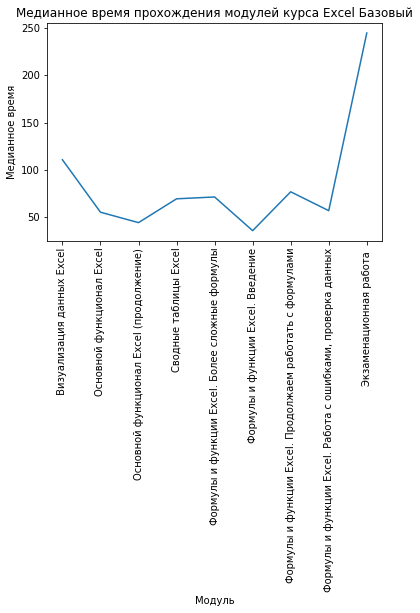

In [76]:
# plotting and investigating the graphs for each course
draw_line(0)

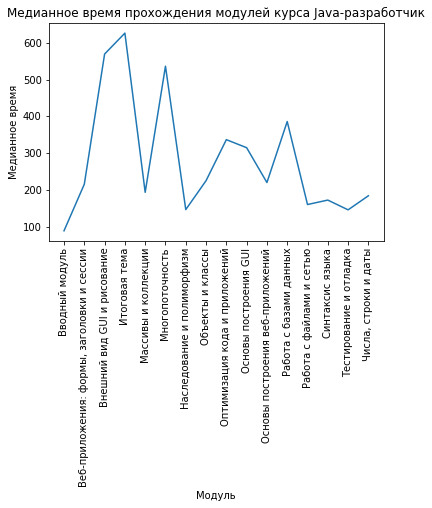

In [77]:
draw_line(1)

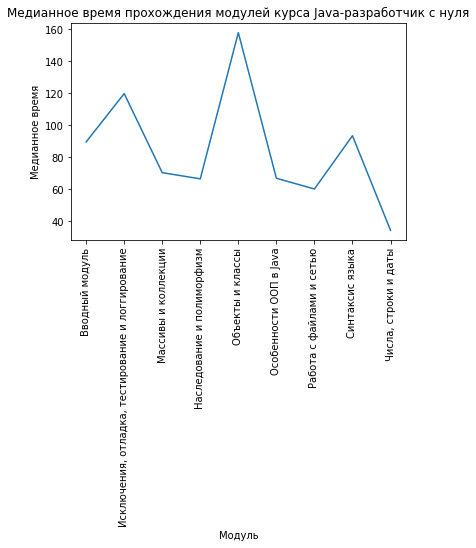

In [78]:
draw_line(2)

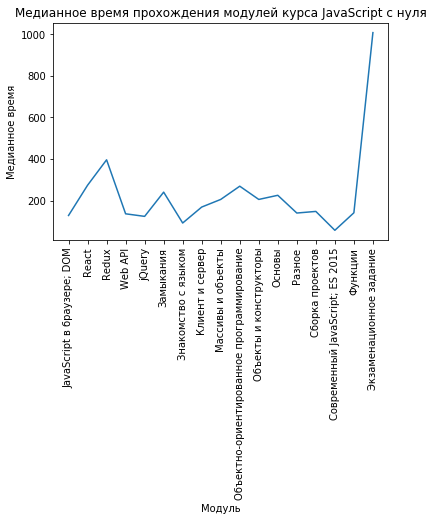

In [79]:
draw_line(3)

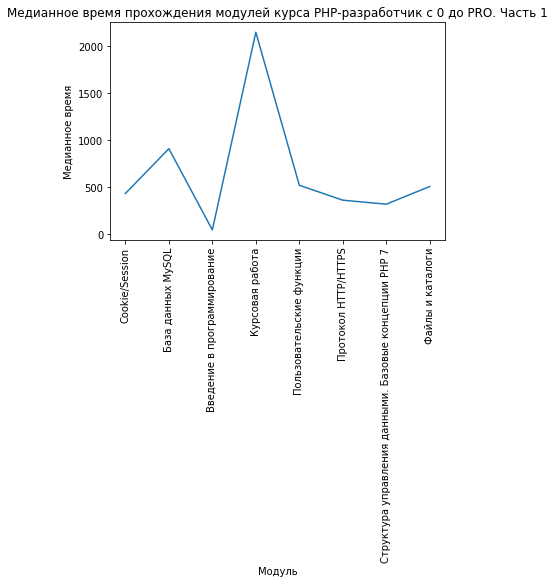

In [80]:
draw_line(4)

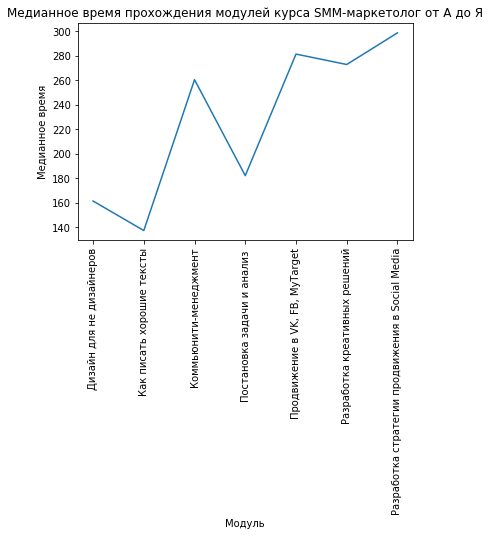

In [81]:
draw_line(5)

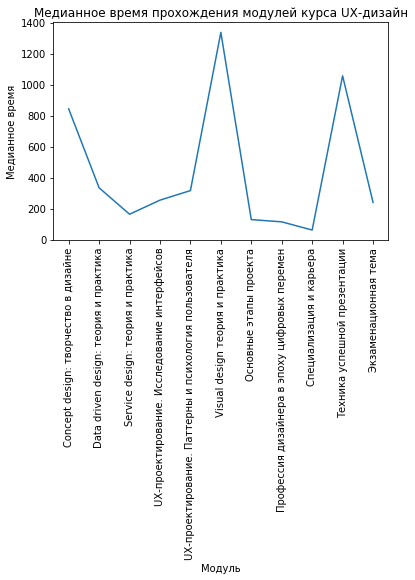

In [82]:
draw_line(6)

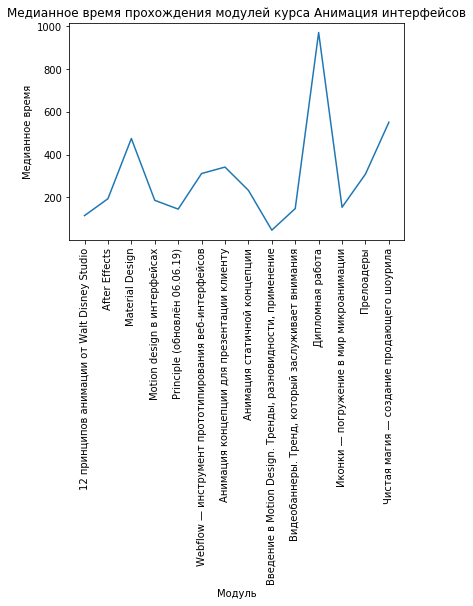

In [83]:
draw_line(7)

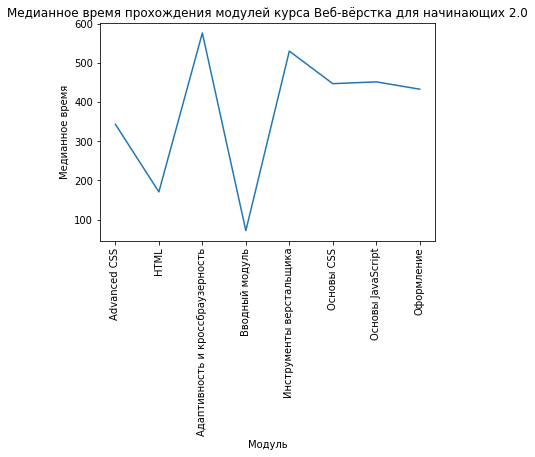

In [84]:
draw_line(8)

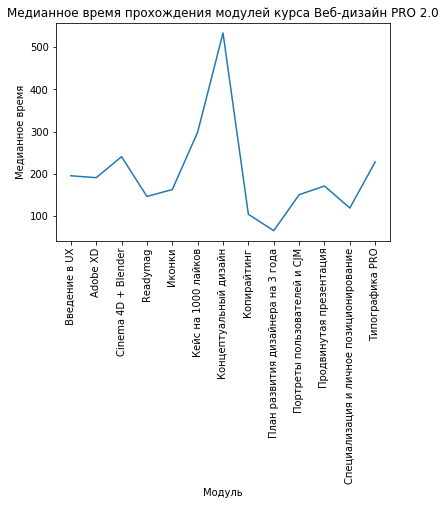

In [85]:
draw_line(9)

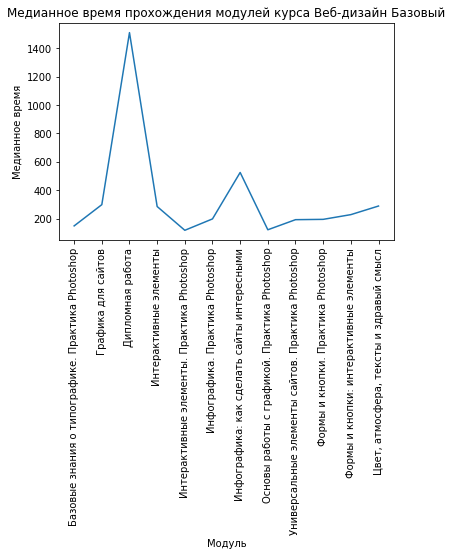

In [86]:
draw_line(10)

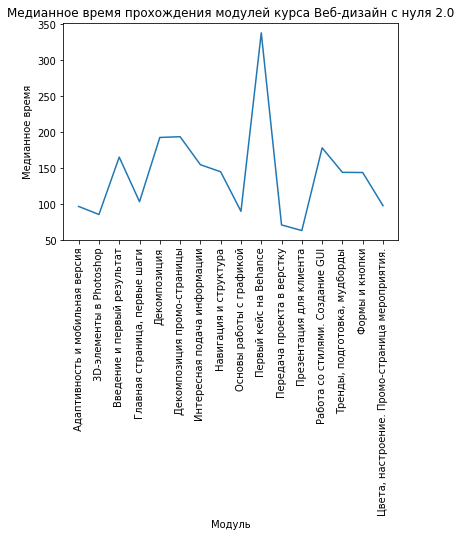

In [87]:
draw_line(11)

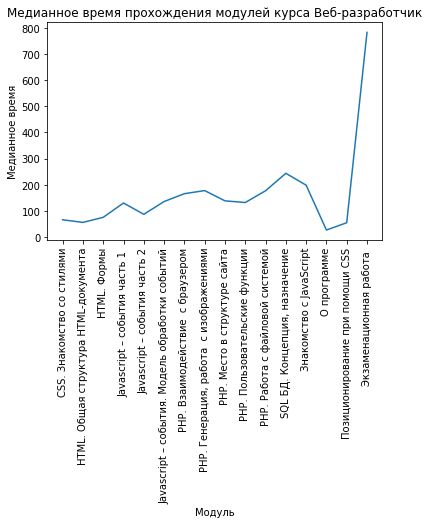

In [88]:
draw_line(12)

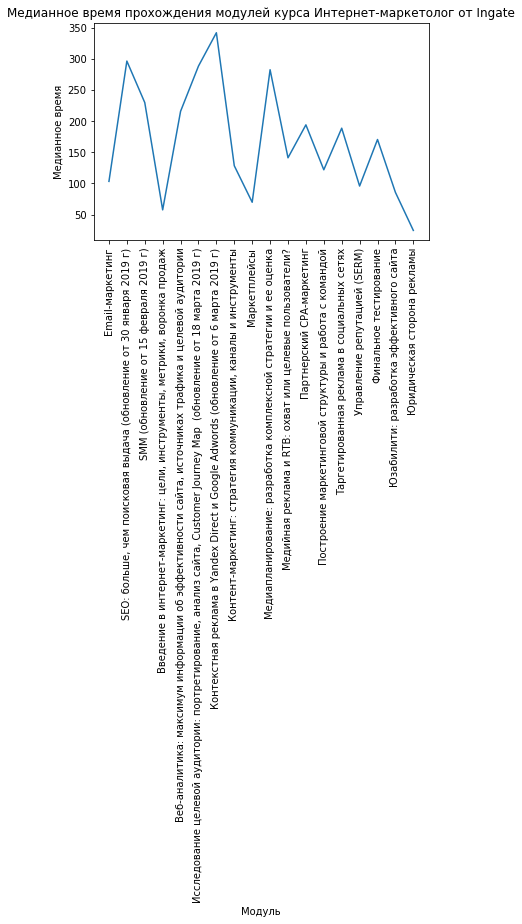

In [89]:
draw_line(13)

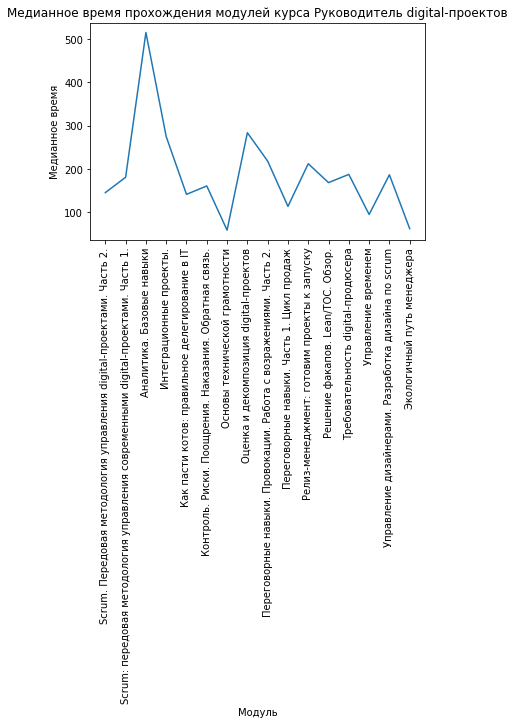

In [90]:
draw_line(14)

### Identifying problematic modules (part 3)

In [96]:
# creating a list with month numbers
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

In [97]:
# changing the start and end date type to string for analysis
tmp3["start_date"] = tmp3["start_date"].astype("str")
tmp3["finish_date"] = tmp3["finish_date"].astype("str")

In [99]:
# creating a separate df for each course to cut the runtime
courses = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
           "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
           "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
           "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
           "Руководитель digital-проектов"]

In [102]:
def create_df(course):
    return tmp3[tmp3["course_title"] == course]

In [103]:
df_list = [create_df(courses[i]) for i in range(len(courses))]

In [105]:
# extracting month numbers
for i, df in enumerate(df_list):
    df_list[i]["month"] = [j[5:7] for j in df_list[i]["start_date"]]

df_list[0].head()

,module_title,start_date,finish_date,status,is_homework,course_title,time,month
428,Основной функционал Excel,2018-12-10 16:15:15.891656,2018-12-12 10:17:59.828500,done,True,Excel Базовый,42.045538,12
442,Визуализация данных Excel,2019-01-19 06:17:52.525892,2019-01-26 09:57:27.308118,done,True,Excel Базовый,171.659662,01
445,Сводные таблицы Excel,2019-01-21 16:32:24.256451,2019-01-26 09:56:31.610190,done,True,Excel Базовый,113.402043,01
448,Формулы и функции Excel. Более сложные формулы,2019-01-08 14:22:11.289178,2019-01-11 12:02:15.758572,done,True,Excel Базовый,69.667908,01
450,Формулы и функции Excel. Продолжаем работать с...,2018-12-18 10:08:04.738329,2019-01-23 20:00:32.450847,done,True,Excel Базовый,873.874365,12


In [109]:
# calculating the values and saving the df list
monthly_medians = []
for i, df in enumerate(df_list):
    monthly_medians.append(df_list[i].groupby("month").agg({"time": "median"}))

In [114]:
# sample output
monthly_medians[0]

,time
month,
01,53.261204
02,53.777709
03,67.882885
04,46.562189
05,57.921152
06,47.638140
07,42.800763
08,85.070791
09,48.288985


In [118]:
# saving to a common df
median_per_month = pd.DataFrame(np.zeros((len(courses), len(months))))
median_per_month.columns = months
median_per_month.index = courses

In [119]:
median_per_month.head()

,01,02,03,04,05,06,07,08,09,10,11,12
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
# filling the found values (leave as 0 for missing months)
def check_df(df, row, column):
    for i in df.index:
        if i == column:
            median_per_month.loc[row, column] = df["time"][i]

In [121]:
for i, row in enumerate(median_per_month.index):
    for column in median_per_month.columns:
        check_df(monthly_medians[i], row, column)

In [122]:
median_per_month.head()

,01,02,03,04,05,06,07,08,09,10,11,12
Excel Базовый,53.261204,53.777709,67.882885,46.562189,57.921152,47.638140,42.800763,85.070791,48.288985,56.820744,71.212308,106.036617
Java-разработчик,137.448109,113.320785,167.022015,220.552521,218.755101,173.823951,146.441334,344.303703,271.291188,219.114997,204.608685,89.355464
Java-разработчик c нуля,0.000000,0.000000,166.656116,73.847503,75.433109,66.611046,42.591225,0.000000,0.000000,0.000000,0.000000,0.000000
JavaScript с нуля,164.019185,138.883220,143.703209,111.677005,132.204750,128.053536,141.741152,191.345748,284.491200,297.898868,215.143466,200.201135
PHP-разработчик с 0 до PRO. Часть 1,277.728223,192.861176,245.511335,259.927614,215.681409,209.355391,144.258158,329.438291,245.615698,570.600044,476.651781,192.841720


### Identifying problematic modules (part 4)

In [129]:
# creating a function to display 15 graphs in one figure
import matplotlib.patches as mpatches

def draw_all():
    # changing figure size
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    # setting x-ticks
    x_ticks = months
    
    # creating a dict to store data for each course
    data_dict = dict()
    for i, row in enumerate(median_per_month.index):
        data_dict["y" + str(i)] = median_per_month.iloc[i]
    
    # creating a list with y-tick variables
    for key, value in data_dict.items():
        globals()[key] = value
    y_ticks = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14]
    
    # a list of contrasting colors
    colors = ["#562349", "#f1ebbb", "#45046a", "#b5076b", "#3f3f44",
              "#abf0e9", "#00005c", "#ffd31d", "#dddddd", "r",
              "#1b1b2f", "#ca5116", "#fc7e2f", "#00909e", "000000"]
    
    # creating (data, color) tuples
    pairs = []
    for i in range(len(y_ticks)):
        pairs.append((y_ticks[i], colors[i]))
    
    # plotting the graphs
    for y_data, color in pairs:
        plt.plot(x_ticks, y_data, color=color)
    
    # creating a legend
    patches = [mpatches.Patch(color=colors[i], label=courses[i]) for i in range(len(courses))]
    
    plt.legend(handles=patches, fontsize=10, frameon=False, bbox_to_anchor=(1.0, 1.0))
    
    # title, axis labels
    plt.title("Медианное время прохождения каждого курса по месяцам")
    plt.xlabel("Месяц")
    plt.ylabel("Медианное время")
    
    # removing the frame
    plt.box(on=None)
    plt.show()

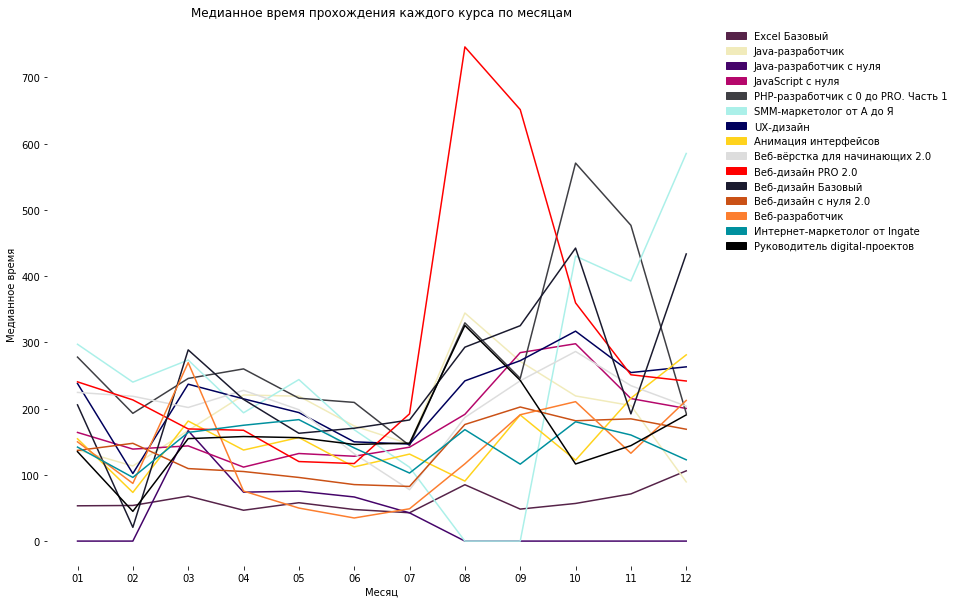

In [130]:
draw_all()

### Identifying problematic modules (part 5)

Minimum module completion time for 13 out 15 courses is recorded incorrectly (negative values appear occasionally).  Maximum values vary strongly across courses depending on the module difficulty. For courses with an examination work, the examination work itself is typically the most time-consuming component. The UX-design course is, however, an exception - it is possible that the final examination for this course is below required difficulty level. In addition to this, peaks often occur for case studies and practical assignments which demonstrates their relative difficulty for the students. Mean values are shifted because of the examination components; they are significantly greater than median values.

Regarding the median assignment completion time by month, most of the courses follow a specific trend - low workload level in the first half of the year and gradual or rapid increase in the second half. The most rapid increase in the second half of the year is observed for the “Веб-дизайн PRO 2.0” (“Web-design PRO 2.0”) course while the workload of the “Java-разработчик с нуля” (“Java developer from scratch”) course drops to zero by August. Other courses, for the most part, occupy intermediate values between those two extremes.

## 4. Calculating conversion

### Calculating conversion (part 1)

In [145]:
tmp4 = main[["module_number", "lesson_number", "start_date", "finish_date", "student_id", 
             "module_title", "course_title", "course_field", "is_homework", "status"]]
tmp4["lesson_number"] = tmp4["lesson_number"].astype(int)
tmp4["module_number"] = tmp4["module_number"].astype(int)
tmp4 = tmp4[tmp4["is_homework"] == True]

In [172]:
# creating a separate df for each course to cut the runtime
courses = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
           "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
           "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
           "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
           "Руководитель digital-проектов"]

In [147]:
def create_df(course):
    return tmp4[tmp4["course_title"] == course]

In [148]:
df_list = [create_df(courses[i]) for i in range(len(courses))]

In [149]:
# sort the modules within each course
for df in df_list:
    df.sort_values(by="module_number", inplace=True)

In [150]:
# creating a list of dataframes that contain student info
# for students who started and finished assignments in each module
df_counts = [df.groupby("module_title").agg({"start_date": "count", 
                                             "finish_date": "count", "lesson_number": "count"}) for df in df_list]

In [151]:
# creating a separate conversion column in each df
for df in df_counts:
    df["conversion"] = 0

# sorting the new dataframes based on the lesson number
for df in df_counts:
    df.sort_values(by="lesson_number", ascending=False, inplace=True)

In [152]:
# calculating conversion for each course
for df in df_counts:
    for i in range(len(df)):
        
        if i == 0:
            continue
        
        df["conversion"].iloc[i] = df["start_date"].iloc[i] / df["finish_date"].iloc[i - 1]

In [153]:
# sample results
df_counts[0]

,start_date,finish_date,lesson_number,conversion
module_title,,,,
Основной функционал Excel,518,458,518,0.000000
Основной функционал Excel (продолжение),434,406,434,0.947598
Формулы и функции Excel. Введение,398,387,398,0.980296
Формулы и функции Excel. Продолжаем работать с формулами,345,303,345,0.891473
Формулы и функции Excel. Более сложные формулы,298,270,298,0.983498
"Формулы и функции Excel. Работа с ошибками, проверка данных",263,242,263,0.974074
Визуализация данных Excel,238,200,238,0.983471
Сводные таблицы Excel,202,186,202,1.010000
Экзаменационная работа,191,91,191,1.026882


### Calculating conversion (part 2)

In [154]:
# creating a function for plotting a bar chart
def draw_bars(data, title):
    
    # getting the figure ready
    fig, subplot = plt.subplots()
    
    # plotting the chart
    subplot.bar(data.index.values, data["conversion"].values)

    # setting a title
    subplot.set_title("Конверсия по курсу " + title)
    
    # changing the x-tick orientation
    plt.xticks(data.index, rotation='vertical')

    plt.show()

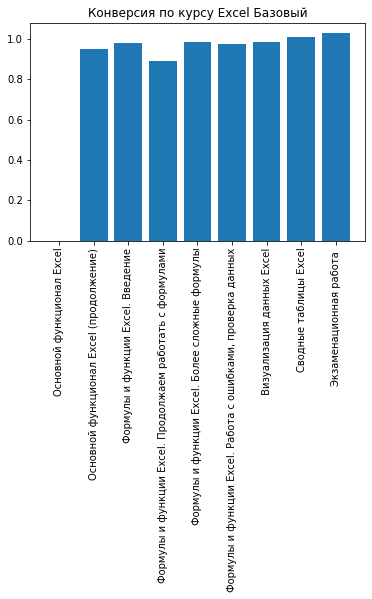

In [155]:
# plotting all 15 graphs one-by-one
draw_bars(df_counts[0], courses[0])

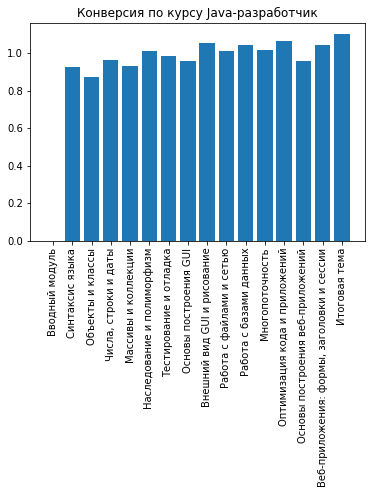

In [156]:
draw_bars(df_counts[1], courses[1])

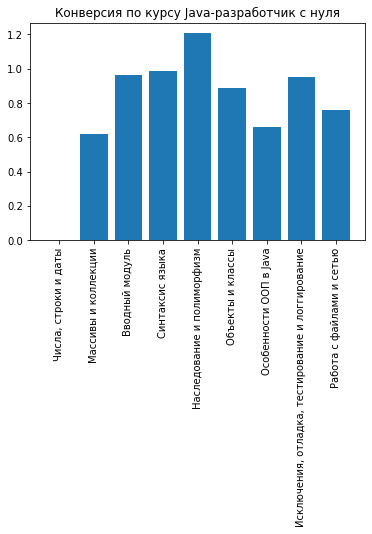

In [157]:
draw_bars(df_counts[2], courses[2])

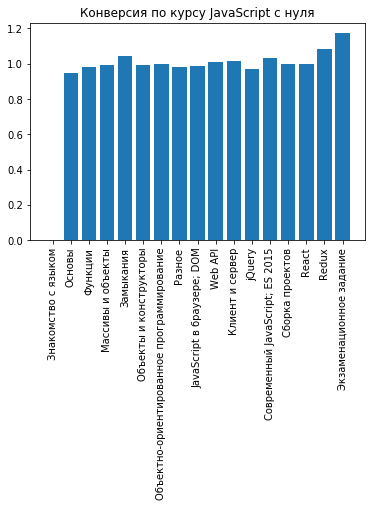

In [158]:
draw_bars(df_counts[3], courses[3])

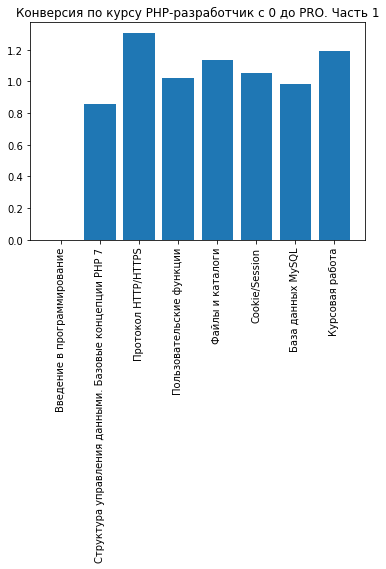

In [159]:
draw_bars(df_counts[4], courses[4])

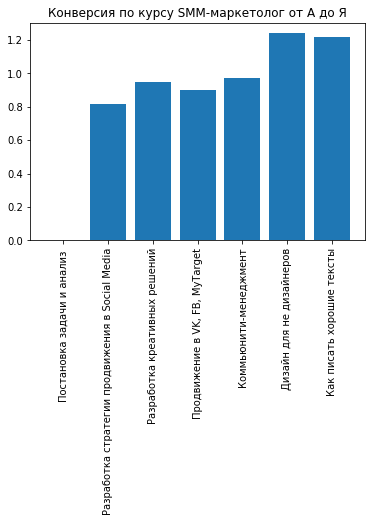

In [160]:
draw_bars(df_counts[5], courses[5])

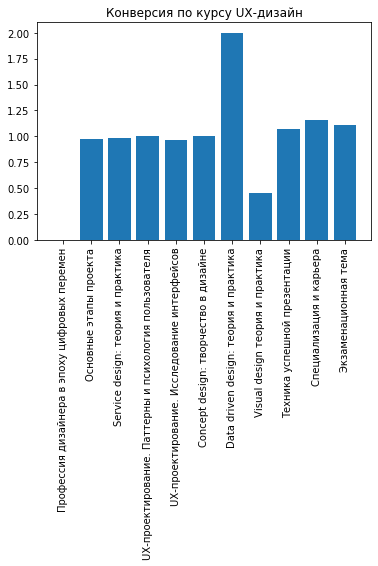

In [161]:
draw_bars(df_counts[6], courses[6])

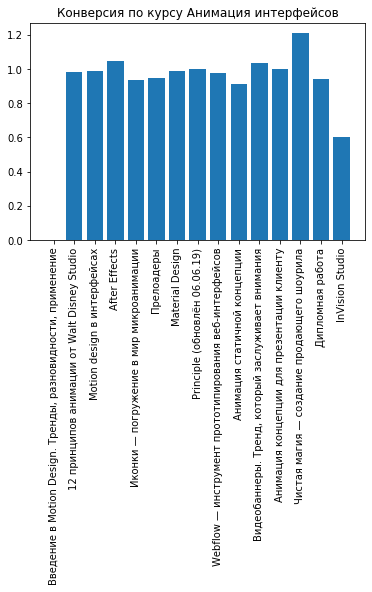

In [162]:
draw_bars(df_counts[7], courses[7])

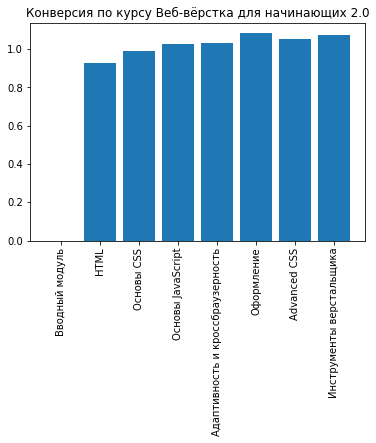

In [163]:
draw_bars(df_counts[8], courses[8])

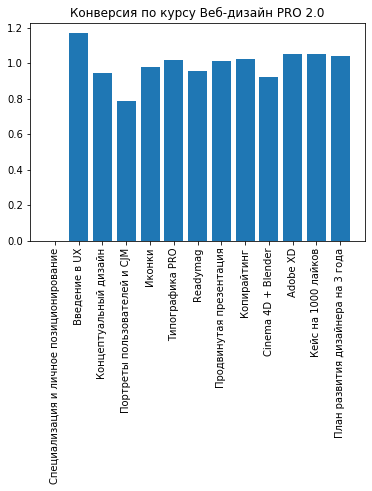

In [164]:
draw_bars(df_counts[9], courses[9])

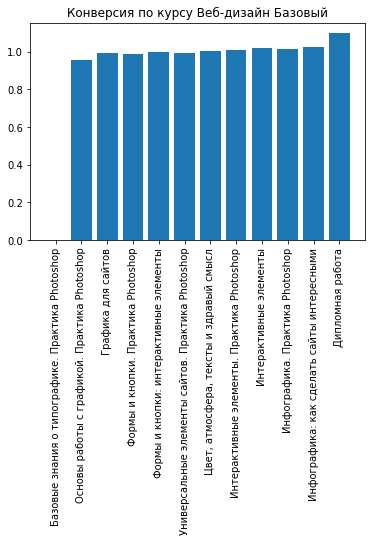

In [165]:
draw_bars(df_counts[10], courses[10])

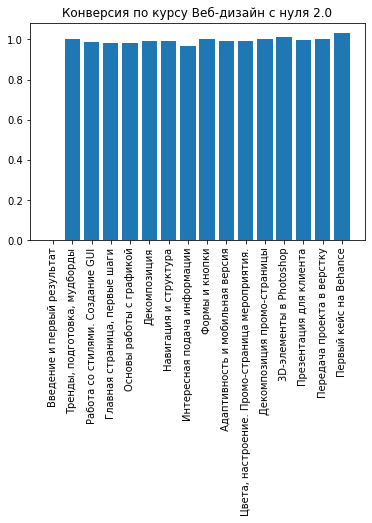

In [166]:
draw_bars(df_counts[11], courses[11])

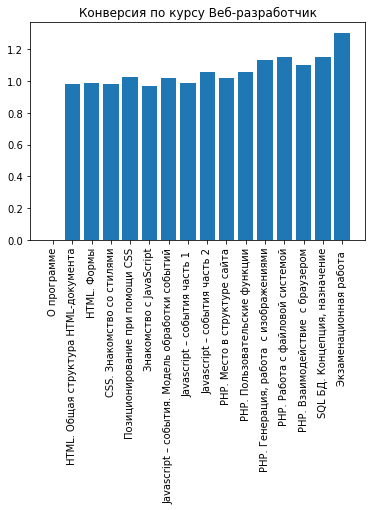

In [167]:
draw_bars(df_counts[12], courses[12])

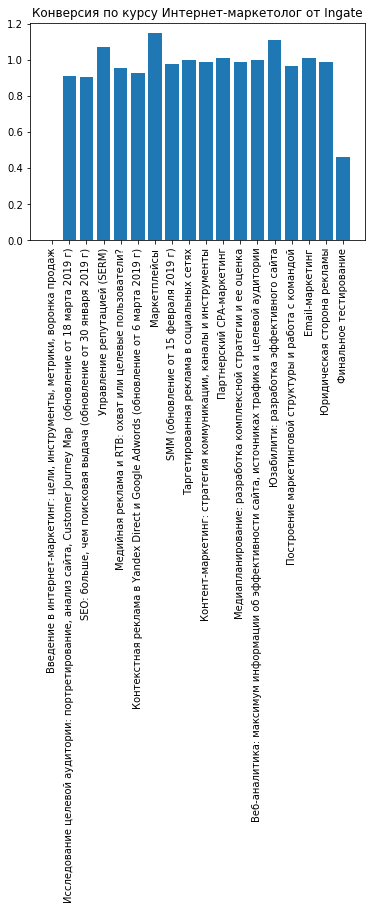

In [168]:
draw_bars(df_counts[13], courses[13])

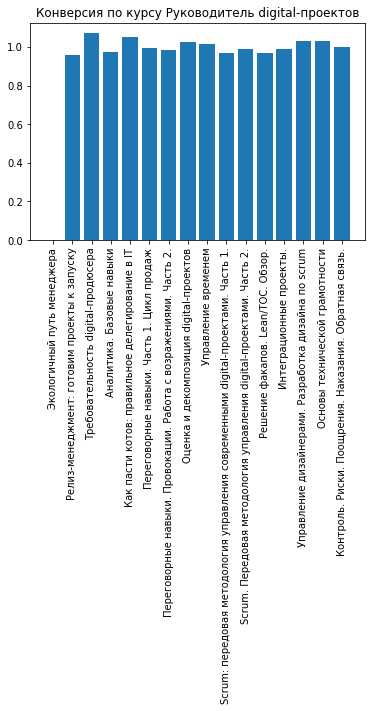

In [169]:
draw_bars(df_counts[14], courses[14])

### Calculating conversion (part 3)

In [207]:
course_list = ["Excel Базовый", "Java-разработчик", "Java-разработчик c нуля", 
               "JavaScript с нуля", "PHP-разработчик с 0 до PRO. Часть 1", "SMM-маркетолог от А до Я",
               "UX-дизайн", "Анимация интерфейсов", "Веб-вёрстка для начинающих 2.0", "Веб-дизайн PRO 2.0",
               "Веб-дизайн Базовый", "Веб-дизайн с нуля 2.0", "Веб-разработчик", "Интернет-маркетолог от Ingate", 
               "Руководитель digital-проектов"]

In [208]:
courses = pd.read_csv("courses.csv")
courses.rename(columns={"id": "course_id", "title": "course_title", "field": "course_field"},
              inplace=True)
courses.sort_values(by="course_title", inplace=True)

In [209]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# creating a function to produce a horizontal bar chart
def draw_hbars(course_index):
    
    data = df_counts[course_index]

    # setting the color based on the course type
    if courses["course_field"].iloc[course_index] == "Marketing":
        color = '#2fe5df'
        label = "Маркетинг"
    elif courses["course_field"].iloc[course_index] == "Design":
        color = 'g'
        label = "Дизайн"
    elif courses["course_field"].iloc[course_index] == "Development":
        color = '#323ee6'
        label = "Разработка"
    else:
        color = 'r'
        label = "Бизнес"

    # plotting the horizontal bar chart
    fig, subplot = plt.subplots()
    ticks = [str(i + 1) + " " + str(data.index[i]) for i in range(len(data))]
    bars = plt.barh(ticks, data["conversion"].values, alpha=0.1, color=color)

    # adding a legend
    plt.legend(handles=[mpatches.Patch(color=color, label=label, alpha=0.1),
                        Line2D([0], [0], color='b', lw=2, label='Медиана')], bbox_to_anchor=(1.0, 1.0))

    # setting a title
    subplot.set_title("Конверсия для курса " + course_list[course_index])

    # drawing the median line
    median_value = np.median(data["conversion"])
    plt.axvline(median_value, color='blue', linewidth=2)
    print(median_value)

    # removing the frame
    plt.box(on=None)

    plt.show()

0.9802955665024631


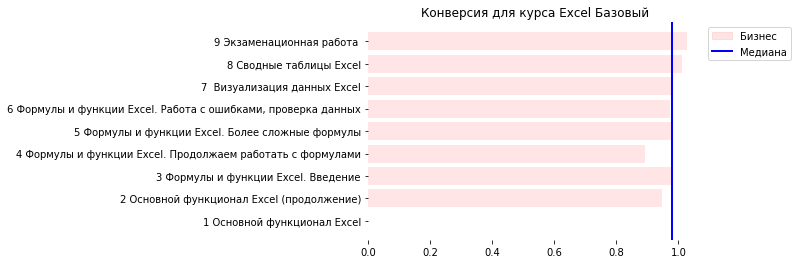

In [210]:
draw_hbars(0)

0.9995303468208093


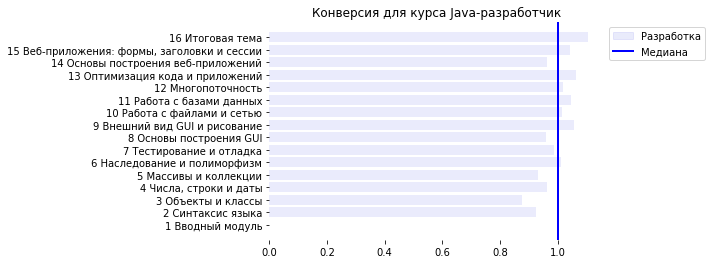

In [211]:
draw_hbars(1)

0.890295358649789


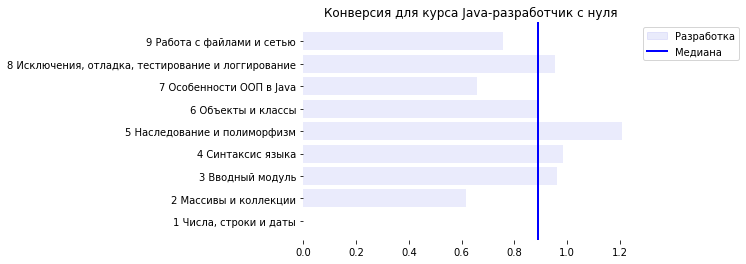

In [212]:
draw_hbars(2)

1.0


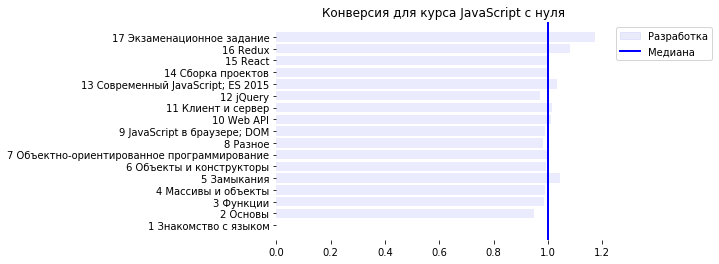

In [213]:
draw_hbars(3)

1.0397777777777777


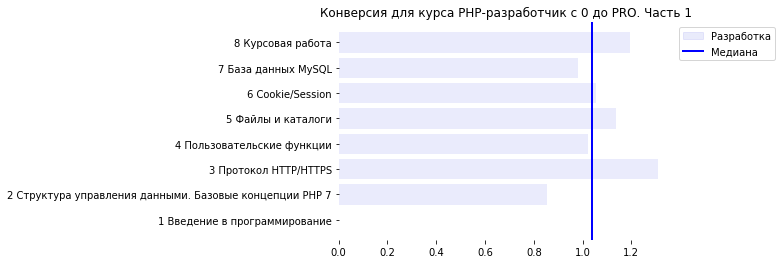

In [214]:
draw_hbars(4)

0.9482758620689655


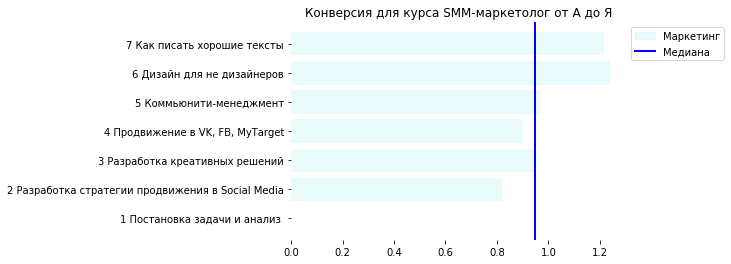

In [215]:
draw_hbars(5)

1.0024509803921569


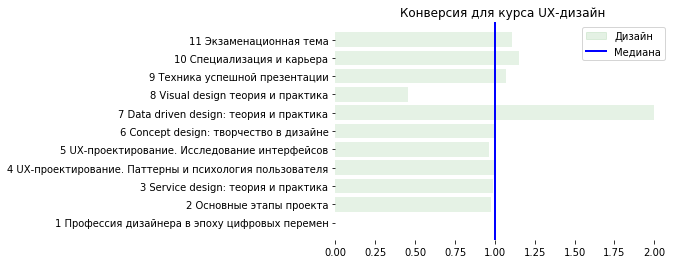

In [216]:
draw_hbars(6)

0.9819494584837545


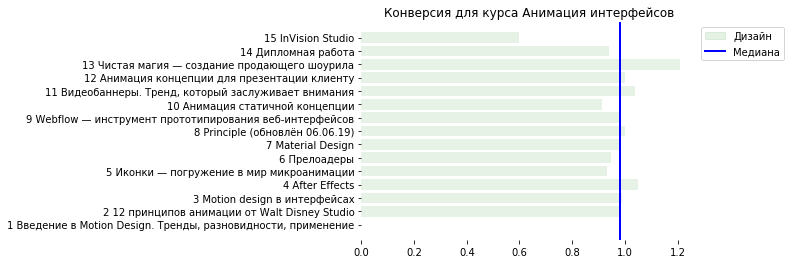

In [217]:
draw_hbars(7)

1.02874756651525


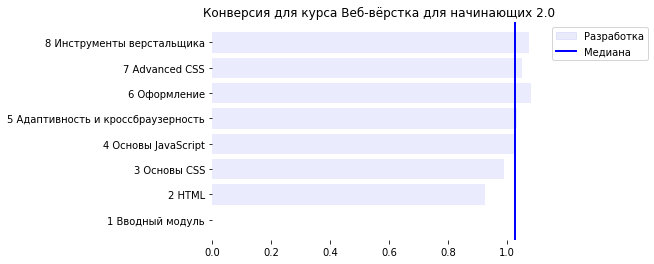

In [218]:
draw_hbars(8)

1.0147058823529411


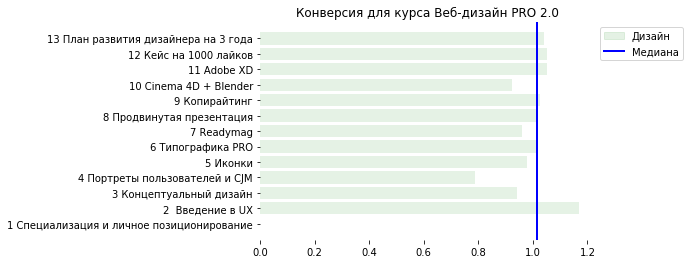

In [219]:
draw_hbars(9)

1.0023584905660377


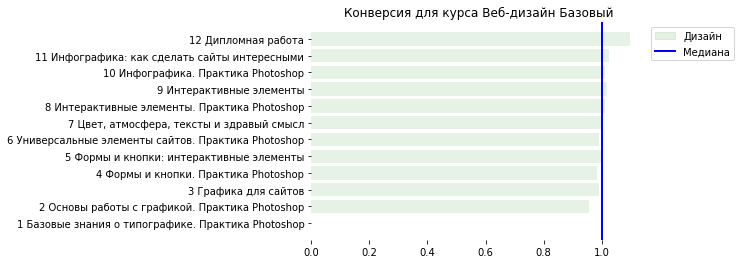

In [220]:
draw_hbars(10)

0.992952820006975


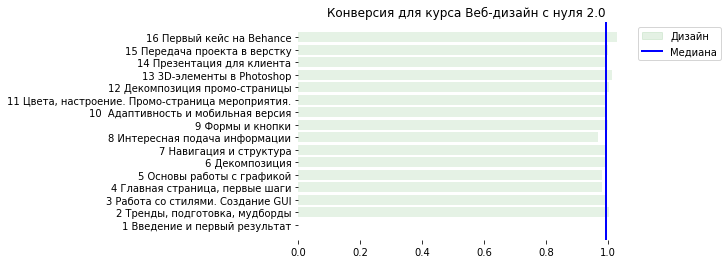

In [221]:
draw_hbars(11)

1.0221590351995293


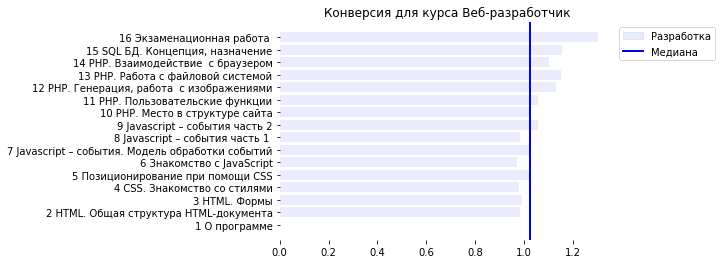

In [222]:
draw_hbars(12)

0.9867595818815331


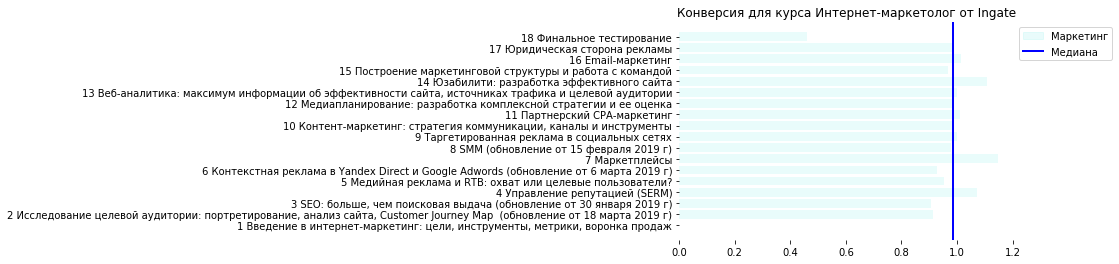

In [223]:
draw_hbars(13)

0.9930447889750216


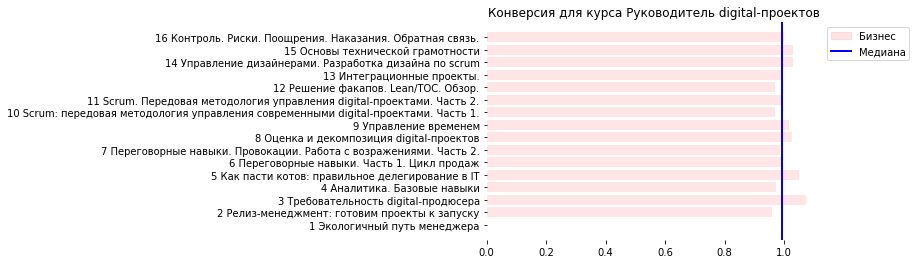

In [224]:
draw_hbars(14)

### Расчет конверсии - часть 4

A significantly high level of conversion is observed for all courses, with the median values being mostly close to 1. The course with the lowest median conversion level is “Java-разработчик с нуля”/“Java developer from scratch” (0.890). It potentially means that the course requires additional effort in delivering the material and helping the students. For some courses like “PHP-разработчик с 0 до PRO” (“PHP developer from 0 to PRO”) and “UX-дизайн” (“UX-design”) the median conversion value is greater than 1. It might mean that the students skip certain modules and proceed to the next ones. This could be explained either by their low difficulty level or, on the contrary, excessive difficulty. The conversion level for other courses is more or less uniform, without any anomalies/outliers.